
# Sales Prediction for Big Mart Outlets


## Problem Statement:

### General iformation:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. 


### Aim:To build a predictive model and predict the sales of each product at a particular outlet.

### Purpose:Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

### Data information:Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

## Data:

    Collected from 2013
    files: train,test and submission

## Dataset information:

    train: 8523 rows and 12 columns
    test: 5681 rows and 11 columns
    submission: 5821 rows and 3 columns

## Type of Problem : Supervised learning

## Target/dependent column to be predicted: Item_Outlet_Sales


In [839]:
#Needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [840]:
os.getcwd()

'/Users/bkannadasan/Documents/GitHub/DataScience/MachineLearning/Linear_regression_practice'

In [841]:
train_data=pd.read_csv('train_bm.csv')

In [842]:
#taking backupof original dataset
train_data_bkp = train_data

In [843]:
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [844]:
train_data.shape

(8523, 12)

In [845]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [846]:
test_data=pd.read_csv('test_bm.csv')

In [847]:
test_data.shape

(5681, 11)

In [848]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [849]:
print(train_data.columns)
print(test_data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [850]:
train_data.columns.difference(test_data.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [851]:
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

# Over all the train dataset holds information about 2 major categories item and outlet

## Item information:


Item_Identifier     : Item ID - object type input

Item_Weight         : Wieght of the item - float64 type input

Item_Fat_Content    : Fat content of the item - object type input

Item_Visibility     : Visibilty % of the particular item comparing total display of all the products in that particular outlet/store - float64 type input

Item_Type           : Type of the item - object type input

Item_MRP            : MRP rate of the item - float64 type input

## outlet information:


Outlet_Identifier           : Outlet ID - object type input

Outlet_Establishment_Year   : The year in which store was established/opened - int64 type input

Outlet_Size                 : Size of the outlet - object type input

Outlet_Location_Type        : Location of the outlet - object type input

Outlet_Type                 : Type of the outlet - object type input


## Target:

Item_Outlet_Sales           : Sales data of the outlet specific to the item - float64 type input



In [852]:
# Identifying null values in the train dataset

train_data.isna().sum()

# Item_Weight & Outlet_Size null values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [853]:
train_data.duplicated().sum()
# No duplicate data exist

np.int64(0)

In [854]:
train_data.shape

(8523, 12)

In [855]:
#Identifying unqiue values on each cataegorical columns

td_cat_cols = train_data.select_dtypes(include='object')
print(len(td_cat_cols.columns))
td_cat_cols.nunique()

7


Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [856]:
td_cat_cols['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [857]:
for i in td_cat_cols.columns:
    print(td_cat_cols[i].value_counts())
    print()


Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count,

In [858]:
for i in td_cat_cols.columns:
    print(i,'=',train_data[i].nunique(),train_data[i].unique())
    print()


Item_Identifier = 1559 ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content = 5 ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Item_Type = 16 ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier = 10 ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size = 3 ['Medium' nan 'High' 'Small']

Outlet_Location_Type = 3 ['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type = 4 ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [859]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [860]:
train_data[['Item_Identifier','Item_Fat_Content']].head(15)

Item_Identifier Item_Fat_Content
0            FDA15          Low Fat
1            DRC01          Regular
2            FDN15          Low Fat
3            FDX07          Regular
4            NCD19          Low Fat
5            FDP36          Regular
6            FDO10          Regular
7            FDP10          Low Fat
8            FDH17          Regular
9            FDU28          Regular
10           FDY07          Low Fat
11           FDA03          Regular
12           FDX32          Regular
13           FDS46          Regular
14           FDF32          Low Fat

In [861]:
fat_content_map = {'Low Fat':'Low_Fat', 'Regular':'Regular', 'low fat':'Low_Fat', 'LF':'Low_Fat', 'reg':'Regular'}

In [862]:
#normalizing the variations Item_Fat_Content column
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].map(fat_content_map)

In [863]:
train_data['Item_Fat_Content'].unique()

array(['Low_Fat', 'Regular'], dtype=object)

In [864]:
train_data['Item_Fat_Content'].head()

0    Low_Fat
1    Regular
2    Low_Fat
3    Regular
4    Low_Fat
Name: Item_Fat_Content, dtype: object

In [865]:
train_data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low_Fat    5517
Regular    3006
Name: count, dtype: int64

In [866]:
train_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [867]:
num_cols=train_data.select_dtypes(exclude='object').columns

In [868]:
train_data[num_cols].corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.014048  0.027141   
Item_Visibility              -0.014048         1.000000 -0.001315   
Item_MRP                      0.027141        -0.001315  1.000000   
Outlet_Establishment_Year    -0.011588        -0.074834  0.005020   
Item_Outlet_Sales             0.014123        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.011588           0.014123  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

In [869]:
train_data.groupby(['Item_Identifier','Item_MRP']).Item_Weight.mean()

Item_Identifier  Item_MRP
DRA12            140.3154    11.60
                 141.6154    11.60
                 141.9154    11.60
                 142.0154    11.60
                 142.3154    11.60
                             ...  
NCZ54            161.5552    14.65
                 161.9552    14.65
                 162.4552    14.65
                 163.4552    14.65
                 164.0552      NaN
Name: Item_Weight, Length: 8019, dtype: float64

In [870]:
train_data[(train_data['Item_Identifier'] == 'NCZ54') ]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
214            NCZ54        14.65          Low_Fat         0.000000   
1896           NCZ54          NaN          Low_Fat         0.082956   
1969           NCZ54        14.65          Low_Fat         0.083528   
2839           NCZ54        14.65          Low_Fat         0.083359   
7166           NCZ54          NaN          Low_Fat         0.145952   
7738           NCZ54        14.65          Low_Fat         0.083699   
7926           NCZ54        14.65          Low_Fat         0.083489   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
214   Household  161.5552            OUT010                       1998   
1896  Household  164.0552            OUT027                       1985   
1969  Household  162.4552            OUT045                       2002   
2839  Household  161.9552            OUT046                       1997   
7166  Household  160.9552            OUT019                       1985   
7738  Household  163.4552            OUT018                       2009   
7926  Household  161.3552            OUT049                       1999   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
214          NaN               Tier 3      Grocery Store           324.9104  
1896      Medium               Tier 3  Supermarket Type3          5523.4768  
1969         NaN               Tier 2  Supermarket Type1          2274.3728  
2839       Small               Tier 1  Supermarket Type1          4711.2008  
7166       Small               Tier 1      Grocery Store           162.4552  
7738      Medium               Tier 3  Supermarket Type2          2599.2832  
7926      Medium               Tier 1  Supermarket Type1          7148.0288

In [871]:
train_data[(train_data['Item_Identifier'] == 'NCZ54') & (train_data['Item_Weight'].isna())]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1896           NCZ54          NaN          Low_Fat         0.082956   
7166           NCZ54          NaN          Low_Fat         0.145952   

      Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
1896  Household  164.0552            OUT027                       1985   
7166  Household  160.9552            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
1896      Medium               Tier 3  Supermarket Type3          5523.4768  
7166       Small               Tier 1      Grocery Store           162.4552

In [872]:
train_data['Item_Weight'][(train_data['Item_Identifier'] == 'NCZ54') ].mean()

np.float64(14.65)

In [873]:
train_data[(train_data['Item_Weight'].isna())]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low_Fat         0.127470   
18             DRI11          NaN          Low_Fat         0.034238   
21             FDW12          NaN          Regular         0.035400   
23             FDC37          NaN          Low_Fat         0.057557   
29             FDC14          NaN          Regular         0.072222   
...              ...          ...              ...              ...   
8485           DRK37          NaN          Low_Fat         0.043792   
8487           DRG13          NaN          Low_Fat         0.037006   
8488           NCN14          NaN          Low_Fat         0.091473   
8490           FDU44          NaN          Regular         0.102296   
8504           NCN18          NaN          Low_Fat         0.124111   

                  Item_Type  Item_MRP Outlet_Identifier  \
7               Snack Foods  107.7622            OUT027   
18              Hard Drinks  113.2834            OUT027   
21             Baking Goods  144.5444            OUT027   
23             Baking Goods  107.6938            OUT019   
29                   Canned   43.6454            OUT019   
...                     ...       ...               ...   
8485            Soft Drinks  189.0530            OUT027   
8487            Soft Drinks  164.7526            OUT027   
8488                 Others  184.6608            OUT027   
8490  Fruits and Vegetables  162.3552            OUT019   
8504              Household  111.7544            OUT027   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
7                          1985      Medium               Tier 3   
18                         1985      Medium               Tier 3   
21                         1985      Medium               Tier 3   
23                         1985       Small               Tier 1   
29                         1985       Small               Tier 1   
...                         ...         ...                  ...   
8485                       1985      Medium               Tier 3   
8487                       1985      Medium               Tier 3   
8488                       1985      Medium               Tier 3   
8490                       1985       Small               Tier 1   
8504                       1985      Medium               Tier 3   

            Outlet_Type  Item_Outlet_Sales  
7     Supermarket Type3          4022.7636  
18    Supermarket Type3          2303.6680  
21    Supermarket Type3          4064.0432  
23        Grocery Store           214.3876  
29        Grocery Store           125.8362  
...                 ...                ...  
8485  Supermarket Type3          6261.8490  
8487  Supermarket Type3          4111.3150  
8488  Supermarket Type3          2756.4120  
8490      Grocery Store           487.3656  
8504  Supermarket Type3          4138.6128  

[1463 rows x 12 columns]

In [874]:
train_data[(train_data['Item_Identifier'] == 'FDP10') ]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low_Fat         0.127470   
585            FDP10         19.0          Low_Fat         0.128066   
2623           FDP10         19.0          Low_Fat         0.128815   
3382           FDP10         19.0          Low_Fat         0.128289   
4585           FDP10         19.0          Low_Fat         0.128090   
6087           FDP10         19.0          Low_Fat         0.128350   
7883           FDP10         19.0          Low_Fat         0.127984   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7     Snack Foods  107.7622            OUT027                       1985   
585   Snack Foods  104.3622            OUT035                       2004   
2623  Snack Foods  107.6622            OUT017                       2007   
3382  Snack Foods  104.9622            OUT049                       1999   
4585  Snack Foods  107.0622            OUT046                       1997   
6087  Snack Foods  106.5622            OUT045                       2002   
7883  Snack Foods  107.6622            OUT013                       1987   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7         Medium               Tier 3  Supermarket Type3          4022.7636  
585        Small               Tier 2  Supermarket Type1          1905.5196  
2623         NaN               Tier 2  Supermarket Type1          1164.4842  
3382      Medium               Tier 1  Supermarket Type1          1164.4842  
4585       Small               Tier 1  Supermarket Type1          1376.2086  
6087         NaN               Tier 2  Supermarket Type1          1482.0708  
7883        High               Tier 3  Supermarket Type1          1270.3464

In [875]:
train_data['Item_Weight'][(train_data['Item_Identifier'] == 'FDP10') ].mean()

np.float64(19.0)

In [876]:
train_data[(train_data['Item_Identifier'] == 'DRG13') ]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3027           DRG13        17.25          Low_Fat         0.037179   
4292           DRG13        17.25          Low_Fat         0.037155   
5323           DRG13        17.25          Low_Fat         0.037338   
6428           DRG13        17.25          Low_Fat         0.037396   
8487           DRG13          NaN          Low_Fat         0.037006   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
3027  Soft Drinks  162.5526            OUT035                       2004   
4292  Soft Drinks  166.4526            OUT013                       1987   
5323  Soft Drinks  163.7526            OUT018                       2009   
6428  Soft Drinks  165.6526            OUT017                       2007   
8487  Soft Drinks  164.7526            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
3027       Small               Tier 2  Supermarket Type1          5920.2936  
4292        High               Tier 3  Supermarket Type1          3782.4098  
5323      Medium               Tier 3  Supermarket Type2          3289.0520  
6428         NaN               Tier 2  Supermarket Type1          1808.9786  
8487      Medium               Tier 3  Supermarket Type3          4111.3150

In [877]:
train_data['Item_Weight'][(train_data['Item_Identifier'] == 'DRG13') ].mean()

np.float64(17.25)

In [878]:
#Adjusting the NaN values Item_Weight with mean values specific to each Item_Identifier
train_data.groupby(['Item_Identifier']).Item_Weight.transform(lambda x:x ).head(10)

#train.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean())).head(10)

0     9.300
1     5.920
2    17.500
3    19.200
4     8.930
5    10.395
6    13.650
7       NaN
8    16.200
9    19.200
Name: Item_Weight, dtype: float64

In [879]:
#Adjusting the NaN values Item_Weight with mean values specific to each Item_Identifier
train_data.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean()))

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [880]:
train_data['Item_Weight'][(train_data['Item_Identifier'] == 'DRG13') ]

3027    17.25
4292    17.25
5323    17.25
6428    17.25
8487      NaN
Name: Item_Weight, dtype: float64

In [881]:
train_data[(train_data['Item_Identifier'] == 'FDP10') ]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low_Fat         0.127470   
585            FDP10         19.0          Low_Fat         0.128066   
2623           FDP10         19.0          Low_Fat         0.128815   
3382           FDP10         19.0          Low_Fat         0.128289   
4585           FDP10         19.0          Low_Fat         0.128090   
6087           FDP10         19.0          Low_Fat         0.128350   
7883           FDP10         19.0          Low_Fat         0.127984   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7     Snack Foods  107.7622            OUT027                       1985   
585   Snack Foods  104.3622            OUT035                       2004   
2623  Snack Foods  107.6622            OUT017                       2007   
3382  Snack Foods  104.9622            OUT049                       1999   
4585  Snack Foods  107.0622            OUT046                       1997   
6087  Snack Foods  106.5622            OUT045                       2002   
7883  Snack Foods  107.6622            OUT013                       1987   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7         Medium               Tier 3  Supermarket Type3          4022.7636  
585        Small               Tier 2  Supermarket Type1          1905.5196  
2623         NaN               Tier 2  Supermarket Type1          1164.4842  
3382      Medium               Tier 1  Supermarket Type1          1164.4842  
4585       Small               Tier 1  Supermarket Type1          1376.2086  
6087         NaN               Tier 2  Supermarket Type1          1482.0708  
7883        High               Tier 3  Supermarket Type1          1270.3464

In [882]:
global_mean = train_data['Item_Weight'].mean()
global_mean

np.float64(12.857645184135976)

In [883]:
#train_data['New_col']=train_data.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean()))

train_data['New_col'] = train_data.groupby('Item_Identifier').Item_Weight.transform(
    lambda x: x.fillna(x.mean() 
                    #    if not x.mean().isna() 
                       if not np.isnan(x.mean())
                       else global_mean)
)

In [884]:
train_data.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean()))

0        9.300
1        5.920
2       17.500
3       19.200
4        8.930
         ...  
8518     6.865
8519     8.380
8520    10.600
8521     7.210
8522    14.800
Name: Item_Weight, Length: 8523, dtype: float64

In [885]:
train_data[['Item_Identifier','Item_Weight','New_col']][train_data['New_col'].isna()]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, New_col]
Index: []

In [886]:
train_data[train_data['Item_Identifier'].isin(['FDN52','FDK57','FDE52','FDQ60'])]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
927            FDN52          NaN          Regular         0.130933   
1922           FDK57          NaN          Low_Fat         0.079904   
4187           FDE52          NaN          Regular         0.029742   
5022           FDQ60          NaN          Regular         0.191501   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
927   Frozen Foods   86.9198            OUT027                       1985   
1922   Snack Foods  120.0440            OUT027                       1985   
4187         Dairy   88.9514            OUT027                       1985   
5022  Baking Goods  121.2098            OUT019                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
927       Medium               Tier 3  Supermarket Type3          1569.9564   
1922      Medium               Tier 3  Supermarket Type3          4434.2280   
4187      Medium               Tier 3  Supermarket Type3          3453.5046   
5022       Small               Tier 1      Grocery Store           120.5098   

        New_col  
927   12.857645  
1922  12.857645  
4187  12.857645  
5022  12.857645

In [887]:
train_data[(train_data['Outlet_Identifier'].isin(['OUT027'])) & (train_data['Item_MRP'] > 86) & (train_data['Item_MRP'] < 87)].sort_values('Item_MRP')

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4451           FDZ37          NaN          Regular         0.019673   
7374           DRE13          NaN          Low_Fat         0.027571   
3585           FDW25          NaN          Low_Fat         0.037218   
927            FDN52          NaN          Regular         0.130933   
783            FDS33          NaN          Regular         0.122831   

         Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
4451        Canned   86.4198            OUT027                       1985   
7374   Soft Drinks   86.6198            OUT027                       1985   
3585        Canned   86.8224            OUT027                       1985   
927   Frozen Foods   86.9198            OUT027                       1985   
783    Snack Foods   86.9514            OUT027                       1985   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
4451      Medium               Tier 3  Supermarket Type3          1918.8356   
7374      Medium               Tier 3  Supermarket Type3          2529.3742   
3585      Medium               Tier 3  Supermarket Type3          1448.7808   
927       Medium               Tier 3  Supermarket Type3          1569.9564   
783       Medium               Tier 3  Supermarket Type3          3364.9532   

        New_col  
4451   8.100000  
7374   6.280000  
3585   5.175000  
927   12.857645  
783    6.670000

In [888]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
New_col                         0
dtype: int64

In [889]:
train_data[train_data['New_col'].isna()]

Empty DataFrame
Columns: [Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales, New_col]
Index: []

In [890]:
train_data[['Item_Identifier','Item_Weight','New_col']][train_data['Item_Identifier'].isin(['DRI11','FDP10','FDW12'])].sort_values(['Item_Identifier'])

Item_Identifier  Item_Weight  New_col
8483           DRI11        8.260    8.260
18             DRI11          NaN    8.260
7192           DRI11        8.260    8.260
7022           DRI11        8.260    8.260
1366           DRI11          NaN    8.260
5310           DRI11        8.260    8.260
3127           DRI11        8.260    8.260
6087           FDP10       19.000   19.000
7883           FDP10       19.000   19.000
7              FDP10          NaN   19.000
2623           FDP10       19.000   19.000
585            FDP10       19.000   19.000
3382           FDP10       19.000   19.000
4585           FDP10       19.000   19.000
2973           FDW12        8.315    8.315
5319           FDW12        8.315    8.315
1788           FDW12        8.315    8.315
6285           FDW12        8.315    8.315
7004           FDW12        8.315    8.315
21             FDW12          NaN    8.315
7259           FDW12        8.315    8.315

In [891]:
train_data['Item_Weight']=train_data['New_col']

In [892]:
num_cols=train_data.select_dtypes(exclude='object').columns

In [893]:
train_data[num_cols].corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.009170  0.025973   
Item_Visibility              -0.009170         1.000000 -0.001315   
Item_MRP                      0.025973        -0.001315  1.000000   
Outlet_Establishment_Year    -0.013416        -0.074834  0.005020   
Item_Outlet_Sales             0.013164        -0.128625  0.567574   
New_col                       1.000000        -0.009170  0.025973   

                           Outlet_Establishment_Year  Item_Outlet_Sales  \
Item_Weight                                -0.013416           0.013164   
Item_Visibility                            -0.074834          -0.128625   
Item_MRP                                    0.005020           0.567574   
Outlet_Establishment_Year                   1.000000          -0.049135   
Item_Outlet_Sales                          -0.049135           1.000000   
New_col                                    -0.013416           0.013164   

                            New_col  
Item_Weight                1.000000  
Item_Visibility           -0.009170  
Item_MRP                   0.025973  
Outlet_Establishment_Year -0.013416  
Item_Outlet_Sales          0.013164  
New_col                    1.000000

Old-Correlation with Null values in Item_Weight column/feature
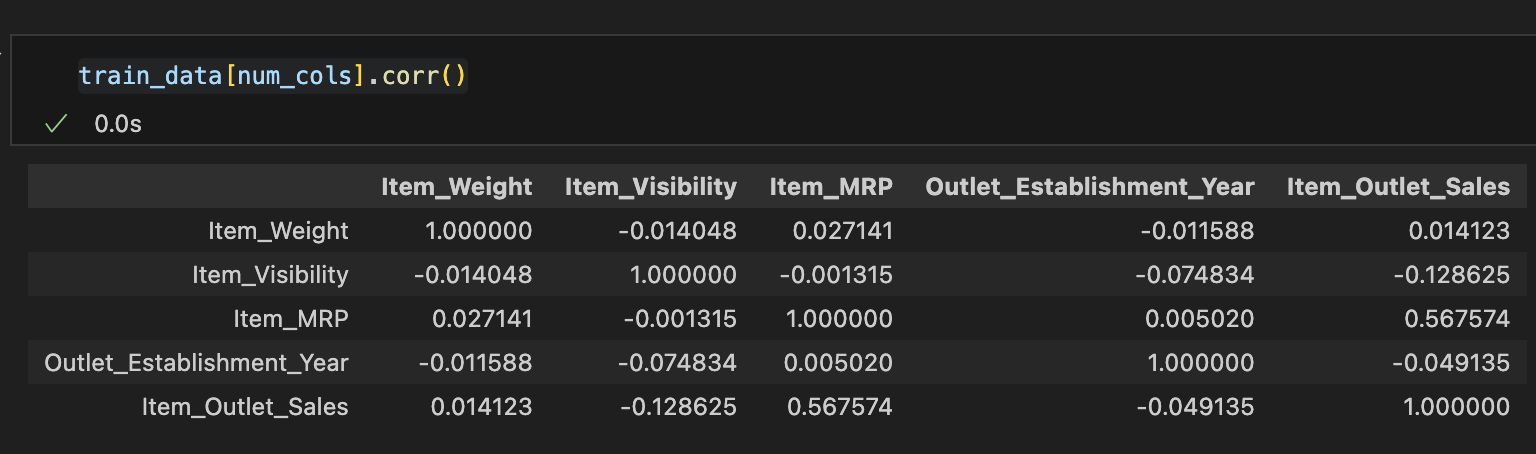

In [894]:
train_data.drop(columns='New_col',inplace=True)

In [895]:
num_cols=train_data.select_dtypes(exclude='object').columns

In [896]:
#New-Correlation after filling Null values in Item_Weight column/feature with mean specific to the product
train_data[num_cols].corr()

Item_Weight  Item_Visibility  Item_MRP  \
Item_Weight                   1.000000        -0.009170  0.025973   
Item_Visibility              -0.009170         1.000000 -0.001315   
Item_MRP                      0.025973        -0.001315  1.000000   
Outlet_Establishment_Year    -0.013416        -0.074834  0.005020   
Item_Outlet_Sales             0.013164        -0.128625  0.567574   

                           Outlet_Establishment_Year  Item_Outlet_Sales  
Item_Weight                                -0.013416           0.013164  
Item_Visibility                            -0.074834          -0.128625  
Item_MRP                                    0.005020           0.567574  
Outlet_Establishment_Year                   1.000000          -0.049135  
Item_Outlet_Sales                          -0.049135           1.000000

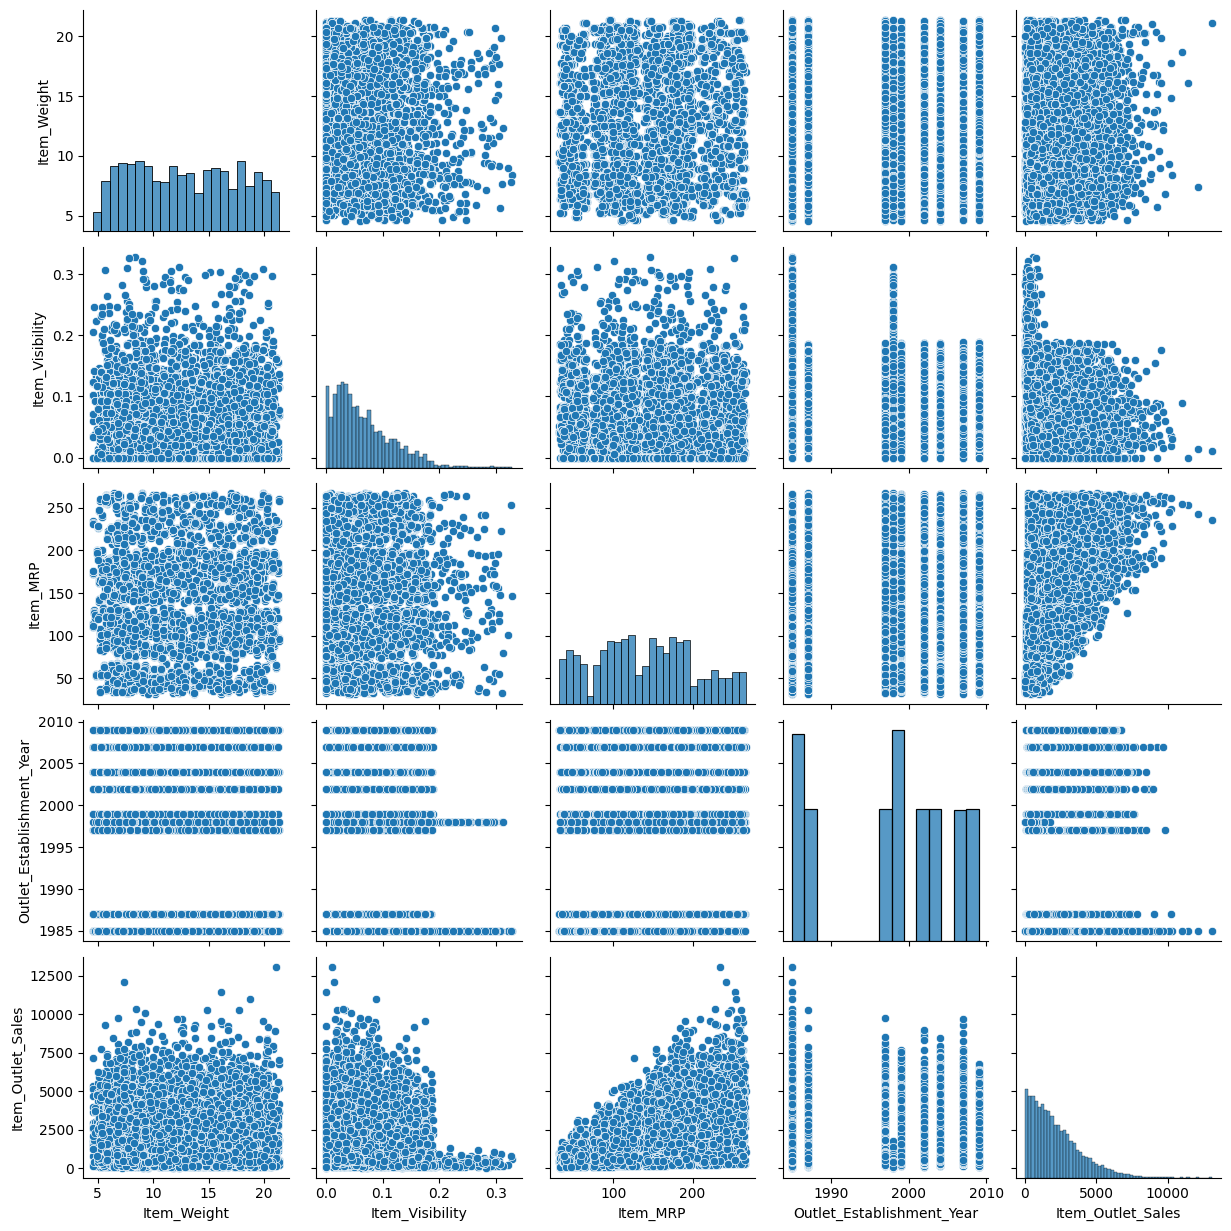

In [897]:
sns.pairplot(train_data[num_cols])

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_8437/2892897371.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['Item_Outlet_Sales'])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

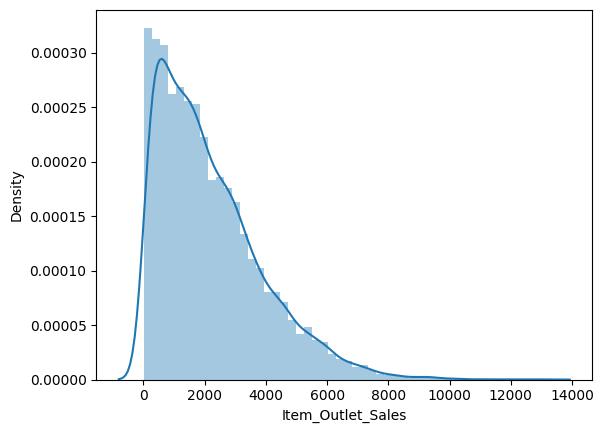

In [898]:
sns.distplot(train_data['Item_Outlet_Sales'])

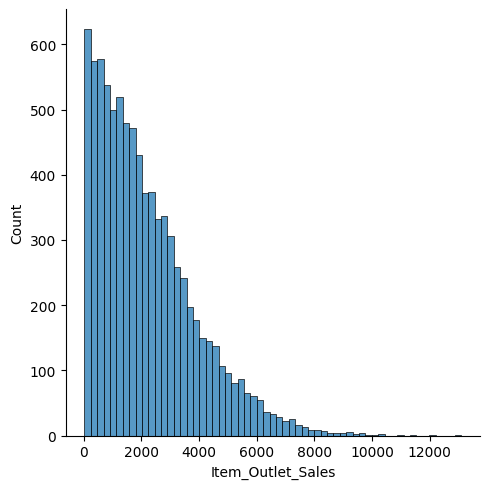

In [899]:
sns.displot(train_data['Item_Outlet_Sales'])

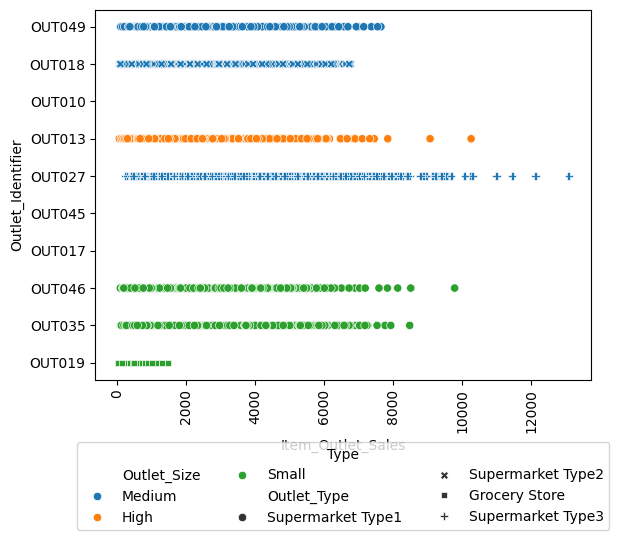

In [900]:
sns.scatterplot(x=train_data['Item_Outlet_Sales'],y=train_data['Outlet_Identifier'],hue=train_data['Outlet_Size'],style=train_data['Outlet_Type'])
plt.xticks(rotation=90)
plt.legend(title='Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)


#size=train_data['Item_Identifier'],style=train_data['Item_Visibility']
# Certain outlets doesn't have values because they have Null values in Outlet_Size, this may lead to miss interpretation of sales

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_8437/1543449258.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)


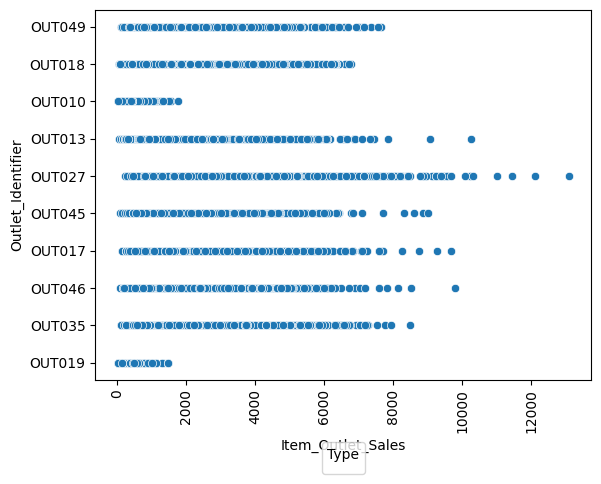

In [901]:
sns.scatterplot(x=train_data['Item_Outlet_Sales'],y=train_data['Outlet_Identifier'],)
plt.xticks(rotation=90)
plt.legend(title='Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

#size=train_data['Item_Identifier'],style=train_data['Item_Visibility']


In [902]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [903]:
train_data['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [904]:
train_data[train_data['Outlet_Identifier'].isin(['OUT010','OUT017','OUT045'])].sort_values('Outlet_Identifier')

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
2966           FDY60       10.500          Regular         0.044140   
2963           FDR27       15.100          Regular         0.160852   
1545           FDK52       18.250          Low_Fat         0.132596   
1548           NCK18        9.600          Low_Fat         0.011211   
...              ...          ...              ...              ...   
5545           DRH01       17.500          Low_Fat         0.098103   
2274           FDI12        9.395          Regular         0.100603   
5539           FDF45       18.200          Regular         0.012229   
5565           FDQ03       15.000          Regular         0.078172   
8519           FDS36        8.380          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
2966           Baking Goods  143.9128            OUT010   
2963                   Meat  131.3942            OUT010   
1545           Frozen Foods  226.2062            OUT010   
1548              Household  166.9184            OUT010   
...                     ...       ...               ...   
5545            Soft Drinks  172.9738            OUT045   
2274           Baking Goods   88.3856            OUT045   
5539  Fruits and Vegetables   56.8904            OUT045   
5565                   Meat  238.8248            OUT045   
8519           Baking Goods  108.1570            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
3                          1998         NaN               Tier 3   
2966                       1998         NaN               Tier 3   
2963                       1998         NaN               Tier 3   
1545                       1998         NaN               Tier 3   
1548                       1998         NaN               Tier 3   
...                         ...         ...                  ...   
5545                       2002         NaN               Tier 2   
2274                       2002         NaN               Tier 2   
5539                       2002         NaN               Tier 2   
5565                       2002         NaN               Tier 2   
8519                       2002         NaN               Tier 2   

            Outlet_Type  Item_Outlet_Sales  
3         Grocery Store           732.3800  
2966      Grocery Store           143.8128  
2963      Grocery Store           397.4826  
1545      Grocery Store           677.1186  
1548      Grocery Store           660.4736  
...                 ...                ...  
5545  Supermarket Type1          4344.3450  
2274  Supermarket Type1           703.0848  
5539  Supermarket Type1          1406.1696  
5565  Supermarket Type1          3555.3720  
8519  Supermarket Type1           549.2850  

[2410 rows x 12 columns]

<Axes: xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

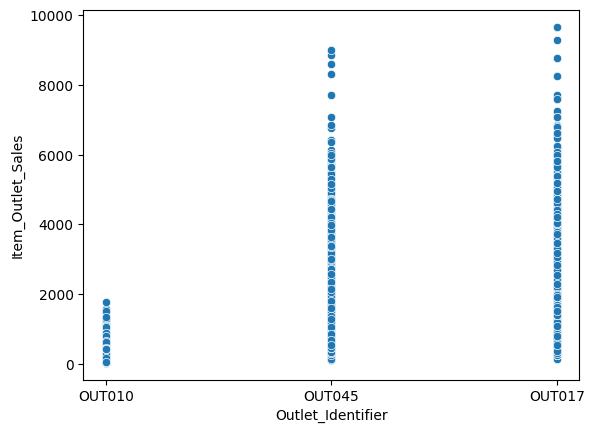

In [905]:
sns.scatterplot(x=train_data['Outlet_Identifier'][train_data['Outlet_Identifier'].isin(['OUT010','OUT017','OUT045'])],y=train_data['Item_Outlet_Sales'])

In [906]:
train_data.groupby(['Outlet_Identifier']).Outlet_Size.value_counts().sort_index()

Outlet_Identifier  Outlet_Size
OUT013             High           932
OUT018             Medium         928
OUT019             Small          528
OUT027             Medium         935
OUT035             Small          930
OUT046             Small          930
OUT049             Medium         930
Name: count, dtype: int64

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

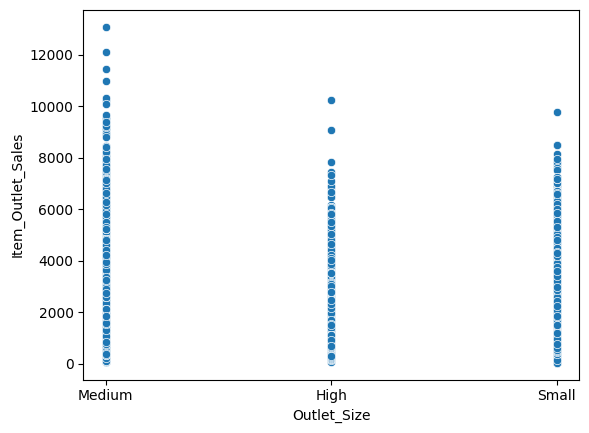

In [907]:
sns.scatterplot(x=train_data['Outlet_Size'],y=train_data['Item_Outlet_Sales'])

In [908]:
check = [i for i in train_data.columns if 'Outlet' in i ]
check

['Outlet_Identifier',
 'Outlet_Establishment_Year',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type',
 'Item_Outlet_Sales']

In [909]:
# train_data[train_data[[i for i in train_data.columns if 'Outlet' in i ]]]

In [910]:
train_data[[i for i in train_data.columns if 'Outlet' in i ]]

Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0               OUT049                       1999      Medium   
1               OUT018                       2009      Medium   
2               OUT049                       1999      Medium   
3               OUT010                       1998         NaN   
4               OUT013                       1987        High   
...                ...                        ...         ...   
8518            OUT013                       1987        High   
8519            OUT045                       2002         NaN   
8520            OUT035                       2004       Small   
8521            OUT018                       2009      Medium   
8522            OUT046                       1997       Small   

     Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0                  Tier 1  Supermarket Type1          3735.1380  
1                  Tier 3  Supermarket Type2           443.4228  
2                  Tier 1  Supermarket Type1          2097.2700  
3                  Tier 3      Grocery Store           732.3800  
4                  Tier 3  Supermarket Type1           994.7052  
...                   ...                ...                ...  
8518               Tier 3  Supermarket Type1          2778.3834  
8519               Tier 2  Supermarket Type1           549.2850  
8520               Tier 2  Supermarket Type1          1193.1136  
8521               Tier 3  Supermarket Type2          1845.5976  
8522               Tier 1  Supermarket Type1           765.6700  

[8523 rows x 6 columns]

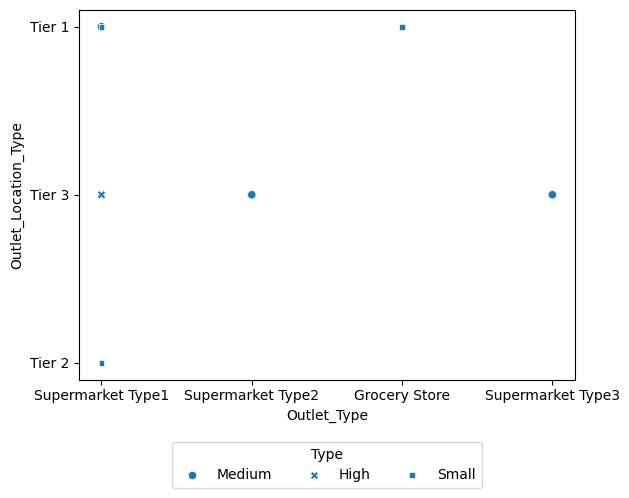

In [911]:
sns.scatterplot(x=train_data['Outlet_Type'],y=train_data['Outlet_Location_Type'],style=train_data['Outlet_Size'])

plt.legend(title='Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

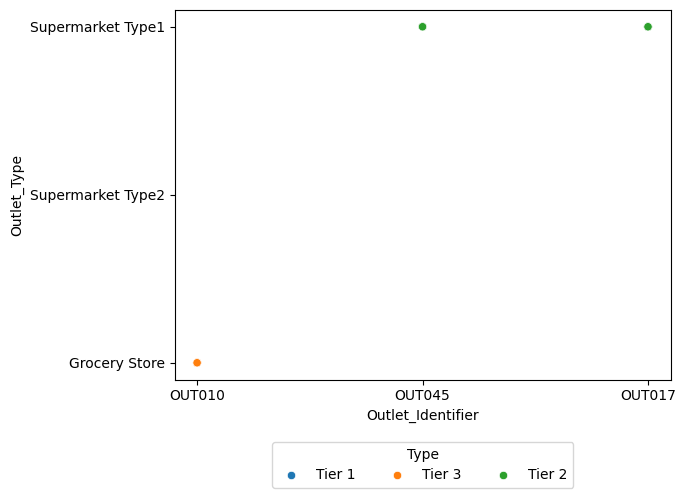

In [912]:
sns.scatterplot(x=train_data['Outlet_Identifier'][train_data['Outlet_Identifier'].isin(['OUT010','OUT017','OUT045'])],y=train_data['Outlet_Type'],hue=train_data['Outlet_Location_Type'])
plt.legend(title='Type', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

In [913]:
train_data['Outlet_Identifier'][train_data['Outlet_Identifier'].isin(['OUT010','OUT017','OUT045'])]

3       OUT010
8       OUT045
9       OUT017
25      OUT017
28      OUT010
         ...  
8502    OUT045
8508    OUT045
8509    OUT010
8514    OUT045
8519    OUT045
Name: Outlet_Identifier, Length: 2410, dtype: object

In [914]:
train_data[['Outlet_Identifier','Outlet_Location_Type']][train_data['Outlet_Identifier'].isin(['OUT010','OUT017','OUT045'])].value_counts().sort_index()

Outlet_Identifier  Outlet_Location_Type
OUT010             Tier 3                  555
OUT017             Tier 2                  926
OUT045             Tier 2                  929
Name: count, dtype: int64

In [915]:
train_data[['Outlet_Identifier','Outlet_Location_Type','Outlet_Type']][train_data['Outlet_Identifier'].isin(['OUT010','OUT017','OUT045'])].value_counts().sort_index()

Outlet_Identifier  Outlet_Location_Type  Outlet_Type      
OUT010             Tier 3                Grocery Store        555
OUT017             Tier 2                Supermarket Type1    926
OUT045             Tier 2                Supermarket Type1    929
Name: count, dtype: int64

In [916]:
train_data.groupby(['Outlet_Type','Outlet_Location_Type']).Outlet_Size.value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: count, dtype: int64

In [917]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [918]:
train_data['chk_size']=train_data['Outlet_Size'].fillna('Small')

In [919]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
chk_size                        0
dtype: int64

In [920]:
train_data[['Outlet_Identifier','Outlet_Size','chk_size']][train_data['Outlet_Size'].isna()]

Outlet_Identifier Outlet_Size chk_size
3               OUT010         NaN    Small
8               OUT045         NaN    Small
9               OUT017         NaN    Small
25              OUT017         NaN    Small
28              OUT010         NaN    Small
...                ...         ...      ...
8502            OUT045         NaN    Small
8508            OUT045         NaN    Small
8509            OUT010         NaN    Small
8514            OUT045         NaN    Small
8519            OUT045         NaN    Small

[2410 rows x 3 columns]

In [921]:
train_data['Outlet_Size']=train_data['chk_size']

In [922]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
chk_size                     0
dtype: int64

In [923]:
train_data.drop(columns='chk_size',inplace=True)

In [924]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [925]:
train_data.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low_Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low_Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low_Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10       19.000          Low_Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998       Small               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002       Small               Tier 2   
9                       2007       Small               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [926]:
#Encoding approach for different categorical
train_data.select_dtypes(include='object')


Item_Identifier Item_Fat_Content              Item_Type  \
0              FDA15          Low_Fat                  Dairy   
1              DRC01          Regular            Soft Drinks   
2              FDN15          Low_Fat                   Meat   
3              FDX07          Regular  Fruits and Vegetables   
4              NCD19          Low_Fat              Household   
...              ...              ...                    ...   
8518           FDF22          Low_Fat            Snack Foods   
8519           FDS36          Regular           Baking Goods   
8520           NCJ29          Low_Fat     Health and Hygiene   
8521           FDN46          Regular            Snack Foods   
8522           DRG01          Low_Fat            Soft Drinks   

     Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  
0               OUT049      Medium               Tier 1  Supermarket Type1  
1               OUT018      Medium               Tier 3  Supermarket Type2  
2               OUT049      Medium               Tier 1  Supermarket Type1  
3               OUT010       Small               Tier 3      Grocery Store  
4               OUT013        High               Tier 3  Supermarket Type1  
...                ...         ...                  ...                ...  
8518            OUT013        High               Tier 3  Supermarket Type1  
8519            OUT045       Small               Tier 2  Supermarket Type1  
8520            OUT035       Small               Tier 2  Supermarket Type1  
8521            OUT018      Medium               Tier 3  Supermarket Type2  
8522            OUT046       Small               Tier 1  Supermarket Type1  

[8523 rows x 7 columns]

In [927]:
for i in train_data.select_dtypes(include='object').columns:
    print(i,'-->',train_data[i].nunique(),' -- ',train_data[i].unique())
    print()

Item_Identifier --> 1559  --  ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']

Item_Fat_Content --> 2  --  ['Low_Fat' 'Regular']

Item_Type --> 16  --  ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Outlet_Identifier --> 10  --  ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']

Outlet_Size --> 3  --  ['Medium' 'Small' 'High']

Outlet_Location_Type --> 3  --  ['Tier 1' 'Tier 3' 'Tier 2']

Outlet_Type --> 4  --  ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']



In [928]:
#Applying lable encoding for Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type 
#Item_Fat_Content
fat_content = {'Low_Fat':0,'Regular':1}
#Outlet_Size 
OutletSize = {'Small':0,'Medium':1,'High':2}
#Outlet_Location_Type
LocationType={'Tier 1':1,'Tier 2':2,'Tier 3':3}
#Outlet_Type
OutletType={'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}

In [929]:
# # Applying map to each relevant column individually
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map(fat_content)
train_data['Outlet_Size'] = train_data['Outlet_Size'].map(OutletSize)
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].map(LocationType)
train_data['Outlet_Type'] = train_data['Outlet_Type'].map(OutletType)


In [930]:
train_data.head(10)

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300                 0         0.016047   
1           DRC01        5.920                 1         0.019278   
2           FDN15       17.500                 0         0.016760   
3           FDX07       19.200                 1         0.000000   
4           NCD19        8.930                 0         0.000000   
5           FDP36       10.395                 1         0.000000   
6           FDO10       13.650                 1         0.012741   
7           FDP10       19.000                 0         0.127470   
8           FDH17       16.200                 1         0.016687   
9           FDU28       19.200                 1         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     1            1   
1                       2009            1                     3            2   
2                       1999            1                     1            1   
3                       1998            0                     3            0   
4                       1987            2                     3            1   
5                       2009            1                     3            2   
6                       1987            2                     3            1   
7                       1985            1                     3            3   
8                       2002            0                     2            1   
9                       2007            0                     2            1   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228  
2          2097.2700  
3           732.3800  
4           994.7052  
5           556.6088  
6           343.5528  
7          4022.7636  
8          1076.5986  
9          4710.5350

In [931]:
train_data.select_dtypes(include='object')

Item_Identifier              Item_Type Outlet_Identifier
0              FDA15                  Dairy            OUT049
1              DRC01            Soft Drinks            OUT018
2              FDN15                   Meat            OUT049
3              FDX07  Fruits and Vegetables            OUT010
4              NCD19              Household            OUT013
...              ...                    ...               ...
8518           FDF22            Snack Foods            OUT013
8519           FDS36           Baking Goods            OUT045
8520           NCJ29     Health and Hygiene            OUT035
8521           FDN46            Snack Foods            OUT018
8522           DRG01            Soft Drinks            OUT046

[8523 rows x 3 columns]

In [932]:
train_data_X = train_data

In [933]:
import category_encoders as ce

In [934]:
train_data['Item_Type'].nunique(),train_data['Item_Type'].unique()

(16,
 array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
        'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
        'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
        'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object))

In [935]:
#Binary encoding for Item_Type
encoder = ce.BinaryEncoder(cols=['Item_Type'])
train_data=encoder.fit_transform(train_data)
train_data

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300                 0         0.016047   
1              DRC01        5.920                 1         0.019278   
2              FDN15       17.500                 0         0.016760   
3              FDX07       19.200                 1         0.000000   
4              NCD19        8.930                 0         0.000000   
...              ...          ...               ...              ...   
8518           FDF22        6.865                 0         0.056783   
8519           FDS36        8.380                 1         0.046982   
8520           NCJ29       10.600                 0         0.035186   
8521           FDN46        7.210                 1         0.145221   
8522           DRG01       14.800                 0         0.044878   

      Item_Type_0  Item_Type_1  Item_Type_2  Item_Type_3  Item_Type_4  \
0               0            0            0            0            1   
1               0            0            0            1            0   
2               0            0            0            1            1   
3               0            0            1            0            0   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
8518            0            0            1            1            1   
8519            0            0            1            1            0   
8520            0            1            0            1            0   
8521            0            0            1            1            1   
8522            0            0            0            1            0   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0     249.8092            OUT049                       1999            1   
1      48.2692            OUT018                       2009            1   
2     141.6180            OUT049                       1999            1   
3     182.0950            OUT010                       1998            0   
4      53.8614            OUT013                       1987            2   
...        ...               ...                        ...          ...   
8518  214.5218            OUT013                       1987            2   
8519  108.1570            OUT045                       2002            0   
8520   85.1224            OUT035                       2004            0   
8521  103.1332            OUT018                       2009            1   
8522   75.4670            OUT046                       1997            0   

      Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
0                        1            1          3735.1380  
1                        3            2           443.4228  
2                        1            1          2097.2700  
3                        3            0           732.3800  
4                        3            1           994.7052  
...                    ...          ...                ...  
8518                     3            1          2778.3834  
8519                     2            1           549.2850  
8520                     2            1          1193.1136  
8521                     3            2          1845.5976  
8522                     1            1           765.6700  

[8523 rows x 16 columns]

In [936]:
train_data.select_dtypes(include='object')

Item_Identifier Outlet_Identifier
0              FDA15            OUT049
1              DRC01            OUT018
2              FDN15            OUT049
3              FDX07            OUT010
4              NCD19            OUT013
...              ...               ...
8518           FDF22            OUT013
8519           FDS36            OUT045
8520           NCJ29            OUT035
8521           FDN46            OUT018
8522           DRG01            OUT046

[8523 rows x 2 columns]

In [937]:
#Binary encoding for Item_Identifier
encoder = ce.BinaryEncoder(cols=['Item_Identifier'])
train_data = encoder.fit_transform(train_data)
print(train_data.columns)
print(len(train_data.columns))
train_data

Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')
26


Item_Identifier_0  Item_Identifier_1  Item_Identifier_2  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8518                  0                  0                  1   
8519                  1                  1                  0   
8520                  0                  0                  1   
8521                  0                  1                  1   
8522                  0                  0                  1   

      Item_Identifier_3  Item_Identifier_4  Item_Identifier_5  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8518                  0                  1                  1   
8519                  0                  0                  0   
8520                  0                  1                  1   
8521                  1                  0                  0   
8522                  1                  1                  0   

      Item_Identifier_6  Item_Identifier_7  Item_Identifier_8  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  1   
4                     0                  0                  1   
...                 ...                ...                ...   
8518                  0                  1                  0   
8519                  0                  0                  0   
8520                  0                  0                  0   
8521                  0                  1                  1   
8522                  0                  1                  1   

      Item_Identifier_9  ...  Item_Type_2  Item_Type_3  Item_Type_4  Item_MRP  \
0                     0  ...            0            0            1  249.8092   
1                     1  ...            0            1            0   48.2692   
2                     1  ...            0            1            1  141.6180   
3                     0  ...            1            0            0  182.0950   
4                     0  ...            1            0            1   53.8614   
...                 ...  ...          ...          ...          ...       ...   
8518                  0  ...            1            1            1  214.5218   
8519                  1  ...            1            1            0  108.1570   
8520                  1  ...            0            1            0   85.1224   
8521                  0  ...            1            1            1  103.1332   
8522                  1  ...            0            1            0   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0                OUT049                       1999            1   
1                OUT018                       2009            1   
2                OUT049                       1999            1   
3                OUT010                       1998            0   
4                OUT013                       1987            2   
...                 ...                        ...          ...   
8518             OUT013                       1987            2   
8519             OUT045                       2002            0   
8520             OUT035                       2004            0   
8521             OUT

In [938]:
#One-hot encoding for Outlet_Identifier

encoder = ce.OneHotEncoder(cols=['Outlet_Identifier'],use_cat_names=True)
train_data=encoder.fit_transform(train_data)
train_data

Item_Identifier_0  Item_Identifier_1  Item_Identifier_2  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8518                  0                  0                  1   
8519                  1                  1                  0   
8520                  0                  0                  1   
8521                  0                  1                  1   
8522                  0                  0                  1   

      Item_Identifier_3  Item_Identifier_4  Item_Identifier_5  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8518                  0                  1                  1   
8519                  0                  0                  0   
8520                  0                  1                  1   
8521                  1                  0                  0   
8522                  1                  1                  0   

      Item_Identifier_6  Item_Identifier_7  Item_Identifier_8  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  1   
4                     0                  0                  1   
...                 ...                ...                ...   
8518                  0                  1                  0   
8519                  0                  0                  0   
8520                  0                  0                  0   
8521                  0                  1                  1   
8522                  0                  1                  1   

      Item_Identifier_9  ...  Outlet_Identifier_OUT045  \
0                     0  ...                         0   
1                     1  ...                         0   
2                     1  ...                         0   
3                     0  ...                         0   
4                     0  ...                         0   
...                 ...  ...                       ...   
8518                  0  ...                         0   
8519                  1  ...                         1   
8520                  1  ...                         0   
8521                  0  ...                         0   
8522                  1  ...                         0   

      Outlet_Identifier_OUT017  Outlet_Identifier_OUT046  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         1   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT019  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3    

In [939]:
train_data.columns

Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT019',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [940]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier_0          8523 non-null   int64  
 1   Item_Identifier_1          8523 non-null   int64  
 2   Item_Identifier_2          8523 non-null   int64  
 3   Item_Identifier_3          8523 non-null   int64  
 4   Item_Identifier_4          8523 non-null   int64  
 5   Item_Identifier_5          8523 non-null   int64  
 6   Item_Identifier_6          8523 non-null   int64  
 7   Item_Identifier_7          8523 non-null   int64  
 8   Item_Identifier_8          8523 non-null   int64  
 9   Item_Identifier_9          8523 non-null   int64  
 10  Item_Identifier_10         8523 non-null   int64  
 11  Item_Weight                8523 non-null   float64
 12  Item_Fat_Content           8523 non-null   int64  
 13  Item_Visibility            8523 non-null   float

In [941]:
#Converting year data into numerical data
train_data['Outlet_Age'] = 2024-train_data['Outlet_Establishment_Year']

In [942]:
train_data.drop(columns='Outlet_Establishment_Year',inplace=True)

In [943]:
train_data.columns

Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT019', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales',
       'Outlet_Age'],
      dtype='object')

In [944]:
train_data=train_data[['Item_Identifier_0',
'Item_Identifier_1',
'Item_Identifier_2',
'Item_Identifier_3',
'Item_Identifier_4',
'Item_Identifier_5',
'Item_Identifier_6',
'Item_Identifier_7',
'Item_Identifier_8',
'Item_Identifier_9',
'Item_Identifier_10',
'Item_Weight',
'Item_Fat_Content',
'Item_Visibility',
'Item_Type_0',
'Item_Type_1',
'Item_Type_2',
'Item_Type_3',
'Item_Type_4',
'Item_MRP',
'Outlet_Identifier_OUT049',
'Outlet_Identifier_OUT018',
'Outlet_Identifier_OUT010',
'Outlet_Identifier_OUT013',
'Outlet_Identifier_OUT027',
'Outlet_Identifier_OUT045',
'Outlet_Identifier_OUT017',
'Outlet_Identifier_OUT046',
'Outlet_Identifier_OUT035',
'Outlet_Identifier_OUT019',
'Outlet_Age',
'Outlet_Size',
'Outlet_Location_Type',
'Outlet_Type',
'Item_Outlet_Sales']]

In [945]:
train_data.columns

Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT019', 'Outlet_Age',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [946]:
train_data.corr()

Item_Identifier_0  Item_Identifier_1  \
Item_Identifier_0                  1.000000          -0.449431   
Item_Identifier_1                 -0.449431           1.000000   
Item_Identifier_2                 -0.033731           0.000316   
Item_Identifier_3                 -0.021308          -0.002664   
Item_Identifier_4                 -0.025633          -0.015556   
Item_Identifier_5                 -0.011438          -0.011622   
Item_Identifier_6                 -0.007138          -0.007346   
Item_Identifier_7                 -0.008509          -0.012574   
Item_Identifier_8                 -0.020040           0.009066   
Item_Identifier_9                 -0.011729           0.007721   
Item_Identifier_10                -0.013650           0.002698   
Item_Weight                       -0.072210           0.045427   
Item_Fat_Content                   0.002251           0.033289   
Item_Visibility                    0.006132           0.005684   
Item_Type_0                       -0.017786           0.051271   
Item_Type_1                        0.022473          -0.012941   
Item_Type_2                        0.006728           0.019474   
Item_Type_3                        0.017800           0.001158   
Item_Type_4                        0.004940           0.009959   
Item_MRP                           0.022889          -0.019948   
Outlet_Identifier_OUT049          -0.000542           0.001826   
Outlet_Identifier_OUT018           0.008897          -0.015060   
Outlet_Identifier_OUT010          -0.010311           0.004621   
Outlet_Identifier_OUT013           0.001381           0.001279   
Outlet_Identifier_OUT027          -0.019612           0.010728   
Outlet_Identifier_OUT045           0.010261          -0.003444   
Outlet_Identifier_OUT017          -0.007650           0.002131   
Outlet_Identifier_OUT046           0.008380          -0.002924   
Outlet_Identifier_OUT035           0.009191           0.005785   
Outlet_Identifier_OUT019          -0.002720          -0.005193   
Outlet_Age                        -0.014301           0.008282   
Outlet_Size                       -0.003901           0.000043   
Outlet_Location_Type              -0.008932           0.002209   
Outlet_Type                       -0.007894           0.002670   
Item_Outlet_Sales                  0.010006          -0.007180   

                          Item_Identifier_2  Item_Identifier_3  \
Item_Identifier_0                 -0.033731          -0.021308   
Item_Identifier_1                  0.000316          -0.002664   
Item_Identifier_2                  1.000000           0.000797   
Item_Identifier_3                  0.000797           1.000000   
Item_Identifier_4                  0.007925           0.015243   
Item_Identifier_5                 -0.002146           0.011726   
Item_Identifier_6                  0.003910           0.004056   
Item_Identifier_7                 -0.006356           0.002601   
Item_Identifier_8                 -0.009628           0.005943   
Item_Identifier_9                  0.000999           0.008531   
Item_Identifier_10                 0.000546           0.003425   
Item_Weight                        0.013000          -0.016636   
Item_Fat_Content                   0.004776          -0.004770   
Item_Visibility                   -0.023342           0.024095   
Item_Type_0                       -0.053048          -0.002239   
Item_Type_1                       -0.022716           0.008676   
Item_Type_2                        0.032280          -0.021728   
Item_Type_3                       -0.012221           0.007981   
Item_Type_4                        0.010212          -0.021915   
Item_MRP                           0.034852          -0.009170   
Outlet_Identifier_OUT049          -0.003106           0.012467   
Outlet_Identifier_OUT018          -0.005407          -0.006359   
Outlet_Identifier_OUT010           0.005290           0.004784   
Outlet_Identifier_OUT013           0.005966          -0.009347   

In [947]:
from sklearn.preprocessing import StandardScaler

In [948]:
train_data_X=train_data.drop(columns=['Item_Outlet_Sales'])
train_data_y=train_data['Item_Outlet_Sales']

In [949]:
train_data_X

Item_Identifier_0  Item_Identifier_1  Item_Identifier_2  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8518                  0                  0                  1   
8519                  1                  1                  0   
8520                  0                  0                  1   
8521                  0                  1                  1   
8522                  0                  0                  1   

      Item_Identifier_3  Item_Identifier_4  Item_Identifier_5  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8518                  0                  1                  1   
8519                  0                  0                  0   
8520                  0                  1                  1   
8521                  1                  0                  0   
8522                  1                  1                  0   

      Item_Identifier_6  Item_Identifier_7  Item_Identifier_8  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  1   
4                     0                  0                  1   
...                 ...                ...                ...   
8518                  0                  1                  0   
8519                  0                  0                  0   
8520                  0                  0                  0   
8521                  0                  1                  1   
8522                  0                  1                  1   

      Item_Identifier_9  ...  Outlet_Identifier_OUT027  \
0                     0  ...                         0   
1                     1  ...                         0   
2                     1  ...                         0   
3                     0  ...                         0   
4                     0  ...                         0   
...                 ...  ...                       ...   
8518                  0  ...                         0   
8519                  1  ...                         0   
8520                  1  ...                         0   
8521                  0  ...                         0   
8522                  1  ...                         0   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT017  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         1                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT035  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3    

In [952]:
train_data

Item_Identifier_0  Item_Identifier_1  Item_Identifier_2  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8518                  0                  0                  1   
8519                  1                  1                  0   
8520                  0                  0                  1   
8521                  0                  1                  1   
8522                  0                  0                  1   

      Item_Identifier_3  Item_Identifier_4  Item_Identifier_5  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  0   
4                     0                  0                  0   
...                 ...                ...                ...   
8518                  0                  1                  1   
8519                  0                  0                  0   
8520                  0                  1                  1   
8521                  1                  0                  0   
8522                  1                  1                  0   

      Item_Identifier_6  Item_Identifier_7  Item_Identifier_8  \
0                     0                  0                  0   
1                     0                  0                  0   
2                     0                  0                  0   
3                     0                  0                  1   
4                     0                  0                  1   
...                 ...                ...                ...   
8518                  0                  1                  0   
8519                  0                  0                  0   
8520                  0                  0                  0   
8521                  0                  1                  1   
8522                  0                  1                  1   

      Item_Identifier_9  ...  Outlet_Identifier_OUT045  \
0                     0  ...                         0   
1                     1  ...                         0   
2                     1  ...                         0   
3                     0  ...                         0   
4                     0  ...                         0   
...                 ...  ...                       ...   
8518                  0  ...                         0   
8519                  1  ...                         1   
8520                  1  ...                         0   
8521                  0  ...                         0   
8522                  1  ...                         0   

      Outlet_Identifier_OUT017  Outlet_Identifier_OUT046  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         1   

      Outlet_Identifier_OUT035  Outlet_Identifier_OUT019  Outlet_Age  \
0                            0                         0          25   
1                            0                         0          15   
2                            

In [956]:
train_data.columns

Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT019', 'Outlet_Age',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [955]:
sns.pairplot(train_data)
plt.show()

In [ ]:
scaling = StandardScaler()

In [ ]:
scaled_cols = scaling.fit_transform(train_data_X)

In [ ]:
train_data_X_scaled_cols =pd.DataFrame(scaled_cols,columns=train_data_X.columns)

In [ ]:
train_data_X_scaled_cols

Item_Identifier_0  Item_Identifier_1  Item_Identifier_2  \
0             -0.675961          -0.725483          -0.954007   
1             -0.675961          -0.725483          -0.954007   
2             -0.675961          -0.725483          -0.954007   
3             -0.675961          -0.725483          -0.954007   
4             -0.675961          -0.725483          -0.954007   
...                 ...                ...                ...   
8518          -0.675961          -0.725483           1.048210   
8519           1.479376           1.378393          -0.954007   
8520          -0.675961          -0.725483           1.048210   
8521          -0.675961           1.378393           1.048210   
8522          -0.675961          -0.725483           1.048210   

      Item_Identifier_3  Item_Identifier_4  Item_Identifier_5  \
0             -0.994501          -0.976459          -0.977147   
1             -0.994501          -0.976459          -0.977147   
2             -0.994501          -0.976459          -0.977147   
3             -0.994501          -0.976459          -0.977147   
4             -0.994501          -0.976459          -0.977147   
...                 ...                ...                ...   
8518          -0.994501           1.024108           1.023387   
8519          -0.994501          -0.976459          -0.977147   
8520          -0.994501           1.024108           1.023387   
8521           1.005530          -0.976459          -0.977147   
8522           1.005530           1.024108          -0.977147   

      Item_Identifier_6  Item_Identifier_7  Item_Identifier_8  \
0             -0.990774          -0.982437          -0.992635   
1             -0.990774          -0.982437          -0.992635   
2             -0.990774          -0.982437          -0.992635   
3             -0.990774          -0.982437           1.007419   
4             -0.990774          -0.982437           1.007419   
...                 ...                ...                ...   
8518          -0.990774           1.017877          -0.992635   
8519          -0.990774          -0.982437          -0.992635   
8520          -0.990774          -0.982437          -0.992635   
8521          -0.990774           1.017877           1.007419   
8522          -0.990774           1.017877           1.007419   

      Item_Identifier_9  ...  Outlet_Identifier_OUT027  \
0             -0.993801  ...                 -0.351028   
1              1.006238  ...                 -0.351028   
2              1.006238  ...                 -0.351028   
3             -0.993801  ...                 -0.351028   
4             -0.993801  ...                 -0.351028   
...                 ...  ...                       ...   
8518          -0.993801  ...                 -0.351028   
8519           1.006238  ...                 -0.351028   
8520           1.006238  ...                 -0.351028   
8521          -0.993801  ...                 -0.351028   
8522           1.006238  ...                 -0.351028   

      Outlet_Identifier_OUT045  Outlet_Identifier_OUT017  \
0                    -0.349762                 -0.349128   
1                    -0.349762                 -0.349128   
2                    -0.349762                 -0.349128   
3                    -0.349762                 -0.349128   
4                    -0.349762                 -0.349128   
...                        ...                       ...   
8518                 -0.349762                 -0.349128   
8519                  2.859087                 -0.349128   
8520                 -0.349762                 -0.349128   
8521                 -0.349762                 -0.349128   
8522                 -0.349762                 -0.349128   

      Outlet_Identifier_OUT046  Outlet_Identifier_OUT035  \
0                    -0.349973                 -0.349973   
1                    -0.349973                 -0.349973   
2                    -0.349973                 -0.349973   
3    

In [ ]:
print(len(train_data_X_scaled_cols.columns),train_data_X_scaled_cols.columns)

34 Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT019', 'Outlet_Age',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


In [ ]:
train_data_X_scaled_cols.isna().sum()

Item_Identifier_0           0
Item_Identifier_1           0
Item_Identifier_2           0
Item_Identifier_3           0
Item_Identifier_4           0
Item_Identifier_5           0
Item_Identifier_6           0
Item_Identifier_7           0
Item_Identifier_8           0
Item_Identifier_9           0
Item_Identifier_10          0
Item_Weight                 0
Item_Fat_Content            0
Item_Visibility             0
Item_Type_0                 0
Item_Type_1                 0
Item_Type_2                 0
Item_Type_3                 0
Item_Type_4                 0
Item_MRP                    0
Outlet_Identifier_OUT049    0
Outlet_Identifier_OUT018    0
Outlet_Identifier_OUT010    0
Outlet_Identifier_OUT013    0
Outlet_Identifier_OUT027    0
Outlet_Identifier_OUT045    0
Outlet_Identifier_OUT017    0
Outlet_Identifier_OUT046    0
Outlet_Identifier_OUT035    0
Outlet_Identifier_OUT019    0
Outlet_Age                  0
Outlet_Size                 0
Outlet_Location_Type        0
Outlet_Typ

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X=train_data_X_scaled_cols
y=train_data_y

In [ ]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.3,random_state=41)

In [ ]:
model = LinearRegression()

In [ ]:
model

LinearRegression()

In [ ]:
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
model.coef_

array([ 5.86833819e+00,  9.23134655e+00, -8.81330101e-02, -1.73888802e+00,
       -1.70592525e+01,  1.48799820e+01, -2.59349914e+01,  3.92328307e+01,
        1.44502785e+00, -2.88566979e+01, -3.30777759e+00, -1.04387654e+01,
        9.05784363e+00, -1.26655138e+01,  1.48583368e+01, -3.60766939e+00,
        1.33028323e+01, -8.53856918e+00, -1.45777334e+01,  9.74804221e+02,
        5.27363426e+14,  2.15274446e+15, -3.29297265e+15,  1.72044620e+15,
        8.83007077e+15, -6.54919069e+14, -1.28193192e+15,  3.48424646e+14,
       -9.06880760e+14, -1.37345515e+15, -3.37836667e+15, -9.43318016e+14,
        9.76240858e+14, -9.28439336e+15])

In [ ]:
X.columns

Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT019', 'Outlet_Age',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
model.intercept_

np.float64(2176.7615812520953)

In [ ]:
pred_train=model.predict(train_X)
pred_train

array([2417.26158125, 2293.76158125, 2329.51158125, ..., 2403.76158125,
       2831.76158125, 3915.01158125])

In [ ]:
pred_val=model.predict(val_X)
pred_val

array([1648.26158125,  726.01158125,  646.76158125, ..., 2849.26158125,
       2765.41783125, 1428.76158125])

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [ ]:
RMSE=root_mean_squared_error(train_y,pred_train)
print("Train RMSE:",RMSE)
R2=r2_score(train_y,pred_train)
print("Train R_Square:",R2)

Train RMSE: 1109.7657660966654
Train R_Square: 0.5731192452311489


In [ ]:
RMSE=root_mean_squared_error(val_y,pred_val)
print("Train RMSE:",RMSE)
R2=r2_score(val_y,pred_val)
print("Train R_Square:",R2)

Train RMSE: 1163.869981550888
Train R_Square: 0.5445000345898554


In [ ]:
from sklearn.feature_selection import SelectKBest,f_regression

In [ ]:
select_k_best = SelectKBest(f_regression,k=10)

In [ ]:
X_select = select_k_best.fit_transform(X,y)

In [ ]:
select_k_best.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True])

In [ ]:
X.columns

Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT019', 'Outlet_Age',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
X.columns[select_k_best.get_support()]

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT019', 'Outlet_Age', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
X_selected_df=pd.DataFrame(X_select,columns=X.columns[select_k_best.get_support()])

In [ ]:
X_selected_df

Item_Visibility  Item_MRP  Outlet_Identifier_OUT010  \
0           -0.970732  1.747454                 -0.263920   
1           -0.908111 -1.489023                 -0.263920   
2           -0.956917  0.010040                 -0.263920   
3           -1.281758  0.660050                  3.789031   
4           -1.281758 -1.399220                 -0.263920   
...               ...       ...                       ...   
8518        -0.181193  1.180783                 -0.263920   
8519        -0.371154 -0.527301                 -0.263920   
8520        -0.599784 -0.897208                 -0.263920   
8521         1.532880 -0.607977                 -0.263920   
8522        -0.411936 -1.052261                 -0.263920   

      Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
0                    -0.351028                 -0.349973   
1                    -0.351028                 -0.349973   
2                    -0.351028                 -0.349973   
3                    -0.351028                 -0.349973   
4                    -0.351028                 -0.349973   
...                        ...                       ...   
8518                 -0.351028                 -0.349973   
8519                 -0.351028                 -0.349973   
8520                 -0.351028                  2.857362   
8521                 -0.351028                 -0.349973   
8522                 -0.351028                 -0.349973   

      Outlet_Identifier_OUT019  Outlet_Age  Outlet_Size  Outlet_Location_Type  \
0                    -0.256985   -0.139541     0.664080             -1.369334   
1                    -0.256985   -1.334103     0.664080              1.091569   
2                    -0.256985   -0.139541     0.664080             -1.369334   
3                    -0.256985   -0.020085    -0.799954              1.091569   
4                    -0.256985    1.293934     2.128115              1.091569   
...                        ...         ...          ...                   ...   
8518                 -0.256985    1.293934     2.128115              1.091569   
8519                 -0.256985   -0.497909    -0.799954             -0.138882   
8520                 -0.256985   -0.736822    -0.799954             -0.138882   
8521                 -0.256985   -1.334103     0.664080              1.091569   
8522                 -0.256985    0.099372    -0.799954             -1.369334   

      Outlet_Type  
0       -0.252658  
1        1.002972  
2       -0.252658  
3       -1.508289  
4       -0.252658  
...           ...  
8518    -0.252658  
8519    -0.252658  
8520    -0.252658  
8521     1.002972  
8522    -0.252658  

[8523 rows x 10 columns]

In [ ]:
train_X,val_X,train_y,val_y = train_test_split(X_selected_df,y,test_size=0.3,random_state=41)

In [ ]:
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
model.coef_

array([ -12.87654303,  976.96310846, -576.60278336,  835.18388178,
         36.78796666, -511.27641123, -142.90360141,  101.16661226,
        -24.67983792, -417.57177387])

In [ ]:
model.intercept_

np.float64(2176.5261757586627)

In [ ]:
def eval(actual,pred,source,set):
    dict_val={'RMSE':0,'R_Square':0,'Set':0}
    print(source,':')
    dict_val['RMSE'] = float(root_mean_squared_error(actual,pred))
    print ('RMSE:',dict_val['RMSE'])
    dict_val['R_Square'] = r2_score(actual,pred)
    print ('R_Square:',dict_val['R_Square'])
    dict_val['Set'] = set
    # return  [RMSE]+ [R2]+[set]
    return dict_val

In [ ]:
global_res_df = None

In [ ]:
def res_df_mtd(result):
    print(result)
    print('Type of Result:',type(result))


    global global_res_df

    temp_df = pd.DataFrame([result],columns=['RMSE','R_Square','Set'])

    print('temp_df:',temp_df)

    if global_res_df is not None:
        print('inside if loop')
        global_res_df=pd.concat([global_res_df,temp_df],ignore_index=True)
    else:
        print('inside else loop')
        global_res_df=pd.DataFrame(temp_df)
    return global_res_df

In [ ]:
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

In [ ]:
print(root_mean_squared_error(train_y,train_pred))
print(r2_score(val_y,val_pred))

1112.1251782481247
0.5437052720230744


In [ ]:
train_res = eval(train_y,train_pred,'Train DS','Train_res1')

Train DS :
RMSE: 1112.1251782481247
R_Square: 0.5713021801638367


In [ ]:
train_res

{'RMSE': 1112.1251782481247,
 'R_Square': 0.5713021801638367,
 'Set': 'Train_res1'}

In [ ]:
result = res_df_mtd(train_res)
result

{'RMSE': 1112.1251782481247, 'R_Square': 0.5713021801638367, 'Set': 'Train_res1'}
Type of Result: <class 'dict'>
temp_df:           RMSE  R_Square         Set
0  1112.125178  0.571302  Train_res1
inside else loop


RMSE  R_Square         Set
0  1112.125178  0.571302  Train_res1

In [ ]:
val_res = eval(val_y,val_pred,'Test DS','Test_res1')

Test DS :
RMSE: 1164.8849071573445
R_Square: 0.5437052720230744


In [ ]:
# result1 = res_df(train_res)
result2 = res_df_mtd(val_res)
result2

{'RMSE': 1164.8849071573445, 'R_Square': 0.5437052720230744, 'Set': 'Test_res1'}
Type of Result: <class 'dict'>
temp_df:           RMSE  R_Square        Set
0  1164.884907  0.543705  Test_res1
inside if loop


RMSE  R_Square         Set
0  1112.125178  0.571302  Train_res1
1  1164.884907  0.543705   Test_res1

In [ ]:
#Feature reduction to 5 features

select_k_best = SelectKBest(f_regression,k=5)

In [ ]:
X.shape

(8523, 34)

In [ ]:
X.columns

Index(['Item_Identifier_0', 'Item_Identifier_1', 'Item_Identifier_2',
       'Item_Identifier_3', 'Item_Identifier_4', 'Item_Identifier_5',
       'Item_Identifier_6', 'Item_Identifier_7', 'Item_Identifier_8',
       'Item_Identifier_9', 'Item_Identifier_10', 'Item_Weight',
       'Item_Fat_Content', 'Item_Visibility', 'Item_Type_0', 'Item_Type_1',
       'Item_Type_2', 'Item_Type_3', 'Item_Type_4', 'Item_MRP',
       'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT019', 'Outlet_Age',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
X_select = select_k_best.fit_transform(X,y)

In [ ]:
X.columns[select_k_best.get_support()]

Index(['Item_MRP', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT019', 'Outlet_Type'],
      dtype='object')

In [ ]:
X_selected_df=pd.DataFrame(X_select,columns=X.columns[select_k_best.get_support()])

In [ ]:
X_selected_df

Item_MRP  Outlet_Identifier_OUT010  Outlet_Identifier_OUT027  \
0     1.747454                 -0.263920                 -0.351028   
1    -1.489023                 -0.263920                 -0.351028   
2     0.010040                 -0.263920                 -0.351028   
3     0.660050                  3.789031                 -0.351028   
4    -1.399220                 -0.263920                 -0.351028   
...        ...                       ...                       ...   
8518  1.180783                 -0.263920                 -0.351028   
8519 -0.527301                 -0.263920                 -0.351028   
8520 -0.897208                 -0.263920                 -0.351028   
8521 -0.607977                 -0.263920                 -0.351028   
8522 -1.052261                 -0.263920                 -0.351028   

      Outlet_Identifier_OUT019  Outlet_Type  
0                    -0.256985    -0.252658  
1                    -0.256985     1.002972  
2                    -0.256985    -0.252658  
3                    -0.256985    -1.508289  
4                    -0.256985    -0.252658  
...                        ...          ...  
8518                 -0.256985    -0.252658  
8519                 -0.256985    -0.252658  
8520                 -0.256985    -0.252658  
8521                 -0.256985     1.002972  
8522                 -0.256985    -0.252658  

[8523 rows x 5 columns]

In [ ]:
train_X,val_X,train_y,val_y = train_test_split(X_selected_df,y,test_size=0.3,random_state=41)

In [ ]:
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
model.coef_

array([ 977.87043492, -571.61047219,  650.48350529, -545.74048913,
       -272.14497294])

In [ ]:
model.intercept_

np.float64(2177.020530492681)

In [ ]:
train_pred = model.predict(train_X)
val_pred = model.predict(val_X)

In [ ]:
train_res = eval(train_y,train_pred,'Train DS','Train_res2')

Train DS :
RMSE: 1113.7992395456824
R_Square: 0.5700105871174243


In [ ]:
val_res = eval(val_y,val_pred,'Test DS','Test_res2')

Test DS :
RMSE: 1164.7826604310444
R_Square: 0.5437853702273561


In [ ]:
result = res_df_mtd(train_res)
result

{'RMSE': 1113.7992395456824, 'R_Square': 0.5700105871174243, 'Set': 'Train_res2'}
Type of Result: <class 'dict'>
temp_df:          RMSE  R_Square         Set
0  1113.79924  0.570011  Train_res2
inside if loop


RMSE  R_Square         Set
0  1112.125178  0.571302  Train_res1
1  1164.884907  0.543705   Test_res1
2  1113.799240  0.570011  Train_res2

In [ ]:
result = res_df_mtd(val_res)
result

{'RMSE': 1164.7826604310444, 'R_Square': 0.5437853702273561, 'Set': 'Test_res2'}
Type of Result: <class 'dict'>
temp_df:          RMSE  R_Square        Set
0  1164.78266  0.543785  Test_res2
inside if loop


RMSE  R_Square         Set
0  1112.125178  0.571302  Train_res1
1  1164.884907  0.543705   Test_res1
2  1113.799240  0.570011  Train_res2
3  1164.782660  0.543785   Test_res2

# Negleting identifier filelds and train the model-Starting from Scratch

In [ ]:
os.getcwd()
os.listdir()

['houseprice_pieline_lr2.pkl',
 'Car_pricing.ipynb',
 'model2.ipynb',
 'submission_by_base_modelling.csv',
 'test.csv',
 'houseprice_pieline_lr.pkl',
 'train_bm.csv',
 'sample_submission_8RXa3c6.csv',
 'BigMart_Sales_predict_walkathon.ipynb',
 'test_bm.csv',
 'result.csv',
 'modelload.ipynb',
 'submission_results.csv',
 'model_ppln_ftr_sln.ipynb',
 'bathrooms_price_scatter.png',
 'My_version_BigMart_Sales_predict_walkathon.ipynb',
 'pipeline1.ipynb',
 'House_price_prediction.ipynb',
 'submission_results_with_zero.csv']

In [ ]:
train_data=pd.read_csv('train_bm.csv')

In [ ]:
train_data.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
# Treating null values 
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Treating null values in feature/column Item_Weight-Numberical data/column
train_data.groupby('Item_Identifier').Item_Weight.mean()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

In [ ]:
global_mean = train_data['Item_Weight'].mean()
global_mean

np.float64(12.857645184135976)

In [ ]:
train_data['New_col']=train_data.groupby('Item_Identifier').Item_Weight.transform(lambda x:x.fillna(x.mean() if not np.isnan(x.mean()) else global_mean  ))

In [ ]:
train_data[['Item_Identifier','Item_Weight','New_col']][train_data['Item_Weight'].isna()]

Item_Identifier  Item_Weight  New_col
7              FDP10          NaN   19.000
18             DRI11          NaN    8.260
21             FDW12          NaN    8.315
23             FDC37          NaN   15.500
29             FDC14          NaN   14.500
...              ...          ...      ...
8485           DRK37          NaN    5.000
8487           DRG13          NaN   17.250
8488           NCN14          NaN   19.100
8490           FDU44          NaN   12.150
8504           NCN18          NaN    8.895

[1463 rows x 3 columns]

In [ ]:
train_data[train_data['Item_Identifier']=='FDP10']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7              FDP10          NaN          Low Fat         0.127470   
585            FDP10         19.0          Low Fat         0.128066   
2623           FDP10         19.0          Low Fat         0.128815   
3382           FDP10         19.0          Low Fat         0.128289   
4585           FDP10         19.0          Low Fat         0.128090   
6087           FDP10         19.0          Low Fat         0.128350   
7883           FDP10         19.0          Low Fat         0.127984   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7     Snack Foods  107.7622            OUT027                       1985   
585   Snack Foods  104.3622            OUT035                       2004   
2623  Snack Foods  107.6622            OUT017                       2007   
3382  Snack Foods  104.9622            OUT049                       1999   
4585  Snack Foods  107.0622            OUT046                       1997   
6087  Snack Foods  106.5622            OUT045                       2002   
7883  Snack Foods  107.6622            OUT013                       1987   

     Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
7         Medium               Tier 3  Supermarket Type3          4022.7636   
585        Small               Tier 2  Supermarket Type1          1905.5196   
2623         NaN               Tier 2  Supermarket Type1          1164.4842   
3382      Medium               Tier 1  Supermarket Type1          1164.4842   
4585       Small               Tier 1  Supermarket Type1          1376.2086   
6087         NaN               Tier 2  Supermarket Type1          1482.0708   
7883        High               Tier 3  Supermarket Type1          1270.3464   

      New_col  
7        19.0  
585      19.0  
2623     19.0  
3382     19.0  
4585     19.0  
6087     19.0  
7883     19.0

In [ ]:
train_data['Item_Weight'][train_data['Item_Identifier']=='FDP10'].mean()

np.float64(19.0)

In [ ]:
train_data['Item_Weight']=train_data['New_col']

In [ ]:
train_data=train_data.drop(columns='New_col')

In [ ]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
# Treating null values in feature/column Outlet_Size-object data/column
train_data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [ ]:
#using previuos analysis filling the nan values 'Small' data
#But the ideal way is to analysis and set value accordingly to the analysis
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna('Small')

In [ ]:
train_data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [ ]:
#Removing Identifier columns
train_data=train_data.drop(columns=['Item_Identifier','Outlet_Identifier'])

In [ ]:
train_data

Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300          Low Fat         0.016047                  Dairy   
1           5.920          Regular         0.019278            Soft Drinks   
2          17.500          Low Fat         0.016760                   Meat   
3          19.200          Regular         0.000000  Fruits and Vegetables   
4           8.930          Low Fat         0.000000              Household   
...           ...              ...              ...                    ...   
8518        6.865          Low Fat         0.056783            Snack Foods   
8519        8.380          Regular         0.046982           Baking Goods   
8520       10.600          Low Fat         0.035186     Health and Hygiene   
8521        7.210          Regular         0.145221            Snack Foods   
8522       14.800          Low Fat         0.044878            Soft Drinks   

      Item_MRP  Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0     249.8092                       1999      Medium               Tier 1   
1      48.2692                       2009      Medium               Tier 3   
2     141.6180                       1999      Medium               Tier 1   
3     182.0950                       1998       Small               Tier 3   
4      53.8614                       1987        High               Tier 3   
...        ...                        ...         ...                  ...   
8518  214.5218                       1987        High               Tier 3   
8519  108.1570                       2002       Small               Tier 2   
8520   85.1224                       2004       Small               Tier 2   
8521  103.1332                       2009      Medium               Tier 3   
8522   75.4670                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 10 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [ ]:
train_data.select_dtypes(include='object').columns

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
train_data[train_data.select_dtypes(include='object').columns]

Item_Fat_Content              Item_Type Outlet_Size Outlet_Location_Type  \
0             Low Fat                  Dairy      Medium               Tier 1   
1             Regular            Soft Drinks      Medium               Tier 3   
2             Low Fat                   Meat      Medium               Tier 1   
3             Regular  Fruits and Vegetables       Small               Tier 3   
4             Low Fat              Household        High               Tier 3   
...               ...                    ...         ...                  ...   
8518          Low Fat            Snack Foods        High               Tier 3   
8519          Regular           Baking Goods       Small               Tier 2   
8520          Low Fat     Health and Hygiene       Small               Tier 2   
8521          Regular            Snack Foods      Medium               Tier 3   
8522          Low Fat            Soft Drinks       Small               Tier 1   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type2  
2     Supermarket Type1  
3         Grocery Store  
4     Supermarket Type1  
...                 ...  
8518  Supermarket Type1  
8519  Supermarket Type1  
8520  Supermarket Type1  
8521  Supermarket Type2  
8522  Supermarket Type1  

[8523 rows x 5 columns]

In [ ]:
#normalizing the variations Item_Fat_Content column
train_data['Item_Fat_Content']=train_data['Item_Fat_Content'].map(fat_content_map)

In [ ]:
train_data['Item_Fat_Content'].unique()

array(['Low_Fat', 'Regular'], dtype=object)

In [ ]:
#Applying lable encoding to object column as all of them having ordinal relationship

#Item_Fat_Content
fat_content = {'Low_Fat':0,'Regular':1}
#Outlet_Size 
OutletSize = {'Small':0,'Medium':1,'High':2}
#Outlet_Location_Type
LocationType={'Tier 1':1,'Tier 2':2,'Tier 3':3}
#Outlet_Type
OutletType={'Grocery Store':0,'Supermarket Type1':1,'Supermarket Type2':2,'Supermarket Type3':3}

# # Applying map to each relevant column individually
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map(fat_content)
train_data['Outlet_Size'] = train_data['Outlet_Size'].map(OutletSize)
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].map(LocationType)
train_data['Outlet_Type'] = train_data['Outlet_Type'].map(OutletType)


In [ ]:
train_data[train_data.select_dtypes(include='object').columns]

Item_Type
0                     Dairy
1               Soft Drinks
2                      Meat
3     Fruits and Vegetables
4                 Household
...                     ...
8518            Snack Foods
8519           Baking Goods
8520     Health and Hygiene
8521            Snack Foods
8522            Soft Drinks

[8523 rows x 1 columns]

In [ ]:
train_data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [ ]:
train_data['Item_Type'].nunique()

16

In [ ]:
train_data

Item_Weight  Item_Fat_Content  Item_Visibility              Item_Type  \
0           9.300                 0         0.016047                  Dairy   
1           5.920                 1         0.019278            Soft Drinks   
2          17.500                 0         0.016760                   Meat   
3          19.200                 1         0.000000  Fruits and Vegetables   
4           8.930                 0         0.000000              Household   
...           ...               ...              ...                    ...   
8518        6.865                 0         0.056783            Snack Foods   
8519        8.380                 1         0.046982           Baking Goods   
8520       10.600                 0         0.035186     Health and Hygiene   
8521        7.210                 1         0.145221            Snack Foods   
8522       14.800                 0         0.044878            Soft Drinks   

      Item_MRP  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  \
0     249.8092                       1999            1                     1   
1      48.2692                       2009            1                     3   
2     141.6180                       1999            1                     1   
3     182.0950                       1998            0                     3   
4      53.8614                       1987            2                     3   
...        ...                        ...          ...                   ...   
8518  214.5218                       1987            2                     3   
8519  108.1570                       2002            0                     2   
8520   85.1224                       2004            0                     2   
8521  103.1332                       2009            1                     3   
8522   75.4670                       1997            0                     1   

      Outlet_Type  Item_Outlet_Sales  
0               1          3735.1380  
1               2           443.4228  
2               1          2097.2700  
3               0           732.3800  
4               1           994.7052  
...           ...                ...  
8518            1          2778.3834  
8519            1           549.2850  
8520            1          1193.1136  
8521            2          1845.5976  
8522            1           765.6700  

[8523 rows x 10 columns]

In [ ]:
#Applying one-hot encoding to object column 'Item_Type' since the dataset is nominal

encoder = ce.OneHotEncoder(cols=['Item_Type'],use_cat_names=True)
train_data=encoder.fit_transform(train_data)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Fat_Content                 8523 non-null   int64  
 2   Item_Visibility                  8523 non-null   float64
 3   Item_Type_Dairy                  8523 non-null   int64  
 4   Item_Type_Soft Drinks            8523 non-null   int64  
 5   Item_Type_Meat                   8523 non-null   int64  
 6   Item_Type_Fruits and Vegetables  8523 non-null   int64  
 7   Item_Type_Household              8523 non-null   int64  
 8   Item_Type_Baking Goods           8523 non-null   int64  
 9   Item_Type_Snack Foods            8523 non-null   int64  
 10  Item_Type_Frozen Foods           8523 non-null   int64  
 11  Item_Type_Breakfast              8523 non-null   int64  
 12  Item_Type_Health and

In [ ]:
train_data.duplicated().sum()

np.int64(0)

In [ ]:
train_data.isna().sum()

Item_Weight                        0
Item_Fat_Content                   0
Item_Visibility                    0
Item_Type_Dairy                    0
Item_Type_Soft Drinks              0
Item_Type_Meat                     0
Item_Type_Fruits and Vegetables    0
Item_Type_Household                0
Item_Type_Baking Goods             0
Item_Type_Snack Foods              0
Item_Type_Frozen Foods             0
Item_Type_Breakfast                0
Item_Type_Health and Hygiene       0
Item_Type_Hard Drinks              0
Item_Type_Canned                   0
Item_Type_Breads                   0
Item_Type_Starchy Foods            0
Item_Type_Others                   0
Item_Type_Seafood                  0
Item_MRP                           0
Outlet_Establishment_Year          0
Outlet_Size                        0
Outlet_Location_Type               0
Outlet_Type                        0
Item_Outlet_Sales                  0
dtype: int64

In [ ]:
train_data.corr()

Item_Weight  Item_Fat_Content  \
Item_Weight                         1.000000         -0.026790   
Item_Fat_Content                   -0.026790          1.000000   
Item_Visibility                    -0.009170          0.047314   
Item_Type_Dairy                     0.031985          0.021236   
Item_Type_Soft Drinks              -0.050312         -0.094875   
Item_Type_Meat                     -0.005139          0.118574   
Item_Type_Fruits and Vegetables     0.031976          0.116955   
Item_Type_Household                 0.048336         -0.255203   
Item_Type_Baking Goods             -0.036389          0.083804   
Item_Type_Snack Foods               0.013568          0.059848   
Item_Type_Frozen Foods             -0.006685          0.085041   
Item_Type_Breakfast                -0.002356          0.065711   
Item_Type_Health and Hygiene        0.009709         -0.188156   
Item_Type_Hard Drinks              -0.049035         -0.118461   
Item_Type_Canned                   -0.029180          0.073235   
Item_Type_Breads                   -0.059170          0.032643   
Item_Type_Starchy Foods             0.027647          0.025945   
Item_Type_Others                    0.033808         -0.104988   
Item_Type_Seafood                  -0.006619          0.012594   
Item_MRP                            0.025973          0.006063   
Outlet_Establishment_Year          -0.013416          0.003151   
Outlet_Size                         0.012423          0.001262   
Outlet_Location_Type                0.002936         -0.001598   
Outlet_Type                         0.000534          0.002199   
Item_Outlet_Sales                   0.013164          0.018719   

                                 Item_Visibility  Item_Type_Dairy  \
Item_Weight                            -0.009170         0.031985   
Item_Fat_Content                        0.047314         0.021236   
Item_Visibility                         1.000000         0.035984   
Item_Type_Dairy                         0.035984         1.000000   
Item_Type_Soft Drinks                  -0.009825        -0.069220   
Item_Type_Meat                         -0.017087        -0.067563   
Item_Type_Fruits and Vegetables         0.018969        -0.121232   
Item_Type_Household                    -0.032230        -0.101965   
Item_Type_Baking Goods                  0.016887        -0.084600   
Item_Type_Snack Foods                   0.005635        -0.119386   
Item_Type_Frozen Foods                 -0.003153        -0.098544   
Item_Type_Breakfast                     0.043418        -0.033723   
Item_Type_Health and Hygiene           -0.053931        -0.075176   
Item_Type_Hard Drinks                  -0.003700        -0.047330   
Item_Type_Canned                        0.011114        -0.084670   
Item_Type_Breads                        0.000416        -0.051373   
Item_Type_Starchy Foods                 0.003688        -0.039205   
Item_Type_Others                       -0.016240        -0.041947   
Item_Type_Seafood                       0.014910        -0.025653   
Item_MRP                               -0.001315         0.035551   
Outlet_Establishment_Year              -0.074834        -0.005286   
Outlet_Size                            -0.094025         0.003389   
Outlet_Location_Type                   -0.028099        -0.010098   
Outlet_Type                            -0.173468        -0.012072   
Item_Outlet_Sales                      -0.128625         0.008858   

                                 Item_Type_Soft Drinks  Item_Type_Meat  \
Item_Weight                                  -0.050312       -0.005139   
Item_Fat_Content                             -0.094875        0.118574   
Item_Visibility                              -0.009825       -0.017087   
Item_Type_Dairy                              -0.069220       -0.067563   
Item_Type_Soft Drinks                         1.000000       -0.053769   
Item_Type_Meat                               -0.053769        1.000000   
Ite

In [ ]:
#converting Outlet_Establishment_Year data to Age data

In [ ]:
train_data['Outlet_Age'] = 2024 - train_data['Outlet_Establishment_Year']

In [ ]:
train_data.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type_Dairy  \
0         9.30                 0         0.016047                1   
1         5.92                 1         0.019278                0   
2        17.50                 0         0.016760                0   
3        19.20                 1         0.000000                0   
4         8.93                 0         0.000000                0   

   Item_Type_Soft Drinks  Item_Type_Meat  Item_Type_Fruits and Vegetables  \
0                      0               0                                0   
1                      1               0                                0   
2                      0               1                                0   
3                      0               0                                1   
4                      0               0                                0   

   Item_Type_Household  Item_Type_Baking Goods  Item_Type_Snack Foods  ...  \
0                    0                       0                      0  ...   
1                    0                       0                      0  ...   
2                    0                       0                      0  ...   
3                    0                       0                      0  ...   
4                    1                       0                      0  ...   

   Item_Type_Starchy Foods  Item_Type_Others  Item_Type_Seafood  Item_MRP  \
0                        0                 0                  0  249.8092   
1                        0                 0                  0   48.2692   
2                        0                 0                  0  141.6180   
3                        0                 0                  0  182.0950   
4                        0                 0                  0   53.8614   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0                       1999            1                     1            1   
1                       2009            1                     3            2   
2                       1999            1                     1            1   
3                       1998            0                     3            0   
4                       1987            2                     3            1   

   Item_Outlet_Sales  Outlet_Age  
0          3735.1380          25  
1           443.4228          15  
2          2097.2700          25  
3           732.3800          26  
4           994.7052          37  

[5 rows x 26 columns]

In [ ]:
train_data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type_Dairy',
       'Item_Type_Soft Drinks', 'Item_Type_Meat',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Household',
       'Item_Type_Baking Goods', 'Item_Type_Snack Foods',
       'Item_Type_Frozen Foods', 'Item_Type_Breakfast',
       'Item_Type_Health and Hygiene', 'Item_Type_Hard Drinks',
       'Item_Type_Canned', 'Item_Type_Breads', 'Item_Type_Starchy Foods',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_Age'],
      dtype='object')

In [ ]:
train_data[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type_Dairy',
       'Item_Type_Soft Drinks', 'Item_Type_Meat',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Household',
       'Item_Type_Baking Goods', 'Item_Type_Snack Foods',
       'Item_Type_Frozen Foods', 'Item_Type_Breakfast',
       'Item_Type_Health and Hygiene', 'Item_Type_Hard Drinks',
       'Item_Type_Canned', 'Item_Type_Breads', 'Item_Type_Starchy Foods',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_MRP',
       'Outlet_Establishment_Year','Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type_Dairy  \
0           9.300                 0         0.016047                1   
1           5.920                 1         0.019278                0   
2          17.500                 0         0.016760                0   
3          19.200                 1         0.000000                0   
4           8.930                 0         0.000000                0   
...           ...               ...              ...              ...   
8518        6.865                 0         0.056783                0   
8519        8.380                 1         0.046982                0   
8520       10.600                 0         0.035186                0   
8521        7.210                 1         0.145221                0   
8522       14.800                 0         0.044878                0   

      Item_Type_Soft Drinks  Item_Type_Meat  Item_Type_Fruits and Vegetables  \
0                         0               0                                0   
1                         1               0                                0   
2                         0               1                                0   
3                         0               0                                1   
4                         0               0                                0   
...                     ...             ...                              ...   
8518                      0               0                                0   
8519                      0               0                                0   
8520                      0               0                                0   
8521                      0               0                                0   
8522                      1               0                                0   

      Item_Type_Household  Item_Type_Baking Goods  Item_Type_Snack Foods  ...  \
0                       0                       0                      0  ...   
1                       0                       0                      0  ...   
2                       0                       0                      0  ...   
3                       0                       0                      0  ...   
4                       1                       0                      0  ...   
...                   ...                     ...                    ...  ...   
8518                    0                       0                      1  ...   
8519                    0                       1                      0  ...   
8520                    0                       0                      0  ...   
8521                    0                       0                      1  ...   
8522                    0                       0                      0  ...   

      Item_Type_Starchy Foods  Item_Type_Others  Item_Type_Seafood  Item_MRP  \
0                           0                 0                  0  249.8092   
1                           0                 0                  0   48.2692   
2                           0                 0                  0  141.6180   
3                           0                 0                  0  182.0950   
4                           0                 0                  0   53.8614   
...                       ...               ...                ...       ...   
8518                        0                 0                  0  214.5218   
8519                        0                 0                  0  108.1570   
8520                        0                 0                  0   85.1224   
8521                        0                 0                  0  103.1332   
8522                        0                 0                  0   75.4670   

      Outlet_Establishment_Year  Outlet_Age  Outlet_Size  \
0                          1999          25            1   
1                          2009          15            1   
2                          1999          25           

In [ ]:
train_data=train_data[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type_Dairy',
       'Item_Type_Soft Drinks', 'Item_Type_Meat',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Household',
       'Item_Type_Baking Goods', 'Item_Type_Snack Foods',
       'Item_Type_Frozen Foods', 'Item_Type_Breakfast',
       'Item_Type_Health and Hygiene', 'Item_Type_Hard Drinks',
       'Item_Type_Canned', 'Item_Type_Breads', 'Item_Type_Starchy Foods',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_MRP',
       'Outlet_Establishment_Year','Outlet_Age', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales']]

In [ ]:
train_data=train_data.drop(columns='Outlet_Establishment_Year')

In [ ]:
train_data.corr()

Item_Weight  Item_Fat_Content  \
Item_Weight                         1.000000         -0.026790   
Item_Fat_Content                   -0.026790          1.000000   
Item_Visibility                    -0.009170          0.047314   
Item_Type_Dairy                     0.031985          0.021236   
Item_Type_Soft Drinks              -0.050312         -0.094875   
Item_Type_Meat                     -0.005139          0.118574   
Item_Type_Fruits and Vegetables     0.031976          0.116955   
Item_Type_Household                 0.048336         -0.255203   
Item_Type_Baking Goods             -0.036389          0.083804   
Item_Type_Snack Foods               0.013568          0.059848   
Item_Type_Frozen Foods             -0.006685          0.085041   
Item_Type_Breakfast                -0.002356          0.065711   
Item_Type_Health and Hygiene        0.009709         -0.188156   
Item_Type_Hard Drinks              -0.049035         -0.118461   
Item_Type_Canned                   -0.029180          0.073235   
Item_Type_Breads                   -0.059170          0.032643   
Item_Type_Starchy Foods             0.027647          0.025945   
Item_Type_Others                    0.033808         -0.104988   
Item_Type_Seafood                  -0.006619          0.012594   
Item_MRP                            0.025973          0.006063   
Outlet_Age                          0.013416         -0.003151   
Outlet_Size                         0.012423          0.001262   
Outlet_Location_Type                0.002936         -0.001598   
Outlet_Type                         0.000534          0.002199   
Item_Outlet_Sales                   0.013164          0.018719   

                                 Item_Visibility  Item_Type_Dairy  \
Item_Weight                            -0.009170         0.031985   
Item_Fat_Content                        0.047314         0.021236   
Item_Visibility                         1.000000         0.035984   
Item_Type_Dairy                         0.035984         1.000000   
Item_Type_Soft Drinks                  -0.009825        -0.069220   
Item_Type_Meat                         -0.017087        -0.067563   
Item_Type_Fruits and Vegetables         0.018969        -0.121232   
Item_Type_Household                    -0.032230        -0.101965   
Item_Type_Baking Goods                  0.016887        -0.084600   
Item_Type_Snack Foods                   0.005635        -0.119386   
Item_Type_Frozen Foods                 -0.003153        -0.098544   
Item_Type_Breakfast                     0.043418        -0.033723   
Item_Type_Health and Hygiene           -0.053931        -0.075176   
Item_Type_Hard Drinks                  -0.003700        -0.047330   
Item_Type_Canned                        0.011114        -0.084670   
Item_Type_Breads                        0.000416        -0.051373   
Item_Type_Starchy Foods                 0.003688        -0.039205   
Item_Type_Others                       -0.016240        -0.041947   
Item_Type_Seafood                       0.014910        -0.025653   
Item_MRP                               -0.001315         0.035551   
Outlet_Age                              0.074834         0.005286   
Outlet_Size                            -0.094025         0.003389   
Outlet_Location_Type                   -0.028099        -0.010098   
Outlet_Type                            -0.173468        -0.012072   
Item_Outlet_Sales                      -0.128625         0.008858   

                                 Item_Type_Soft Drinks  Item_Type_Meat  \
Item_Weight                                  -0.050312       -0.005139   
Item_Fat_Content                             -0.094875        0.118574   
Item_Visibility                              -0.009825       -0.017087   
Item_Type_Dairy                              -0.069220       -0.067563   
Item_Type_Soft Drinks                         1.000000       -0.053769   
Item_Type_Meat                               -0.053769        1.000000   
Ite

In [ ]:
#Applying standardization to all data

scaled_cols = StandardScaler()

In [ ]:
#Removing traget column Item_Outlet_Sales before standardizing the data

train_data_X = train_data.drop(columns='Item_Outlet_Sales')
train_data_y = train_data['Item_Outlet_Sales']

In [ ]:
train_data_X_scaled_cols = scaled_cols.fit_transform(train_data_X)

In [ ]:
train_data_X_scaled_cols

array([[-0.7697773 , -0.73814723, -0.97073217, ...,  0.66408049,
        -1.36933384, -0.25265831],
       [-1.49748291,  1.35474328, -0.90811123, ...,  0.66408049,
         1.09156913,  1.00297245],
       [ 0.99566234, -0.73814723, -0.95691733, ...,  0.66408049,
        -1.36933384, -0.25265831],
       ...,
       [-0.48989053, -0.73814723, -0.59978449, ..., -0.79995418,
        -0.13888236, -0.25265831],
       [-1.21974912,  1.35474328,  1.53287976, ...,  0.66408049,
         1.09156913,  1.00297245],
       [ 0.41435904, -0.73814723, -0.41193591, ..., -0.79995418,
        -1.36933384, -0.25265831]])

In [ ]:
train_data_X_scaled_cols = pd.DataFrame(train_data_X_scaled_cols,columns=train_data_X.columns)

In [ ]:
train_data_X_scaled_cols

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type_Dairy  \
0       -0.769777         -0.738147        -0.970732         3.390733   
1       -1.497483          1.354743        -0.908111        -0.294922   
2        0.995662         -0.738147        -0.956917        -0.294922   
3        1.361668          1.354743        -1.281758        -0.294922   
4       -0.849437         -0.738147        -1.281758        -0.294922   
...           ...               ...              ...              ...   
8518    -1.294027         -0.738147        -0.181193        -0.294922   
8519    -0.967851          1.354743        -0.371154        -0.294922   
8520    -0.489891         -0.738147        -0.599784        -0.294922   
8521    -1.219749          1.354743         1.532880        -0.294922   
8522     0.414359         -0.738147        -0.411936        -0.294922   

      Item_Type_Soft Drinks  Item_Type_Meat  Item_Type_Fruits and Vegetables  \
0                 -0.234708       -0.229090                        -0.411066   
1                  4.260611       -0.229090                        -0.411066   
2                 -0.234708        4.365102                        -0.411066   
3                 -0.234708       -0.229090                         2.432698   
4                 -0.234708       -0.229090                        -0.411066   
...                     ...             ...                              ...   
8518              -0.234708       -0.229090                        -0.411066   
8519              -0.234708       -0.229090                        -0.411066   
8520              -0.234708       -0.229090                        -0.411066   
8521              -0.234708       -0.229090                        -0.411066   
8522               4.260611       -0.229090                        -0.411066   

      Item_Type_Household  Item_Type_Baking Goods  Item_Type_Snack Foods  ...  \
0               -0.345735               -0.286855              -0.404805  ...   
1               -0.345735               -0.286855              -0.404805  ...   
2               -0.345735               -0.286855              -0.404805  ...   
3               -0.345735               -0.286855              -0.404805  ...   
4                2.892392               -0.286855              -0.404805  ...   
...                   ...                     ...                    ...  ...   
8518            -0.345735               -0.286855               2.470324  ...   
8519            -0.345735                3.486083              -0.404805  ...   
8520            -0.345735               -0.286855              -0.404805  ...   
8521            -0.345735               -0.286855               2.470324  ...   
8522            -0.345735               -0.286855              -0.404805  ...   

      Item_Type_Canned  Item_Type_Breads  Item_Type_Starchy Foods  \
0            -0.287094         -0.174193                -0.132935   
1            -0.287094         -0.174193                -0.132935   
2            -0.287094         -0.174193                -0.132935   
3            -0.287094         -0.174193                -0.132935   
4            -0.287094         -0.174193                -0.132935   
...                ...               ...                      ...   
8518         -0.287094         -0.174193                -0.132935   
8519         -0.287094         -0.174193                -0.132935   
8520         -0.287094         -0.174193                -0.132935   
8521         -0.287094         -0.174193                -0.132935   
8522         -0.287094         -0.174193                -0.132935   

      Item_Type_Others  Item_Type_Seafood  Item_MRP  Outlet_Age  Outlet_Size  \
0            -0.142232          -0.086982  1.747454   -0.139541     0.664080   
1            -0.142232          -0.086982 -1.489023   -1.334103     0.664080   
2            -0.142232          -0.086982  0.010040   -0.139541     0.664080   
3            -0.142232          -0.086982  0.6

In [ ]:
chk_df=train_data_X_scaled_cols.copy()

In [ ]:
chk_df['Item_Outlet_Sales']=train_data['Item_Outlet_Sales']

In [ ]:
chk_df

Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type_Dairy  \
0       -0.769777         -0.738147        -0.970732         3.390733   
1       -1.497483          1.354743        -0.908111        -0.294922   
2        0.995662         -0.738147        -0.956917        -0.294922   
3        1.361668          1.354743        -1.281758        -0.294922   
4       -0.849437         -0.738147        -1.281758        -0.294922   
...           ...               ...              ...              ...   
8518    -1.294027         -0.738147        -0.181193        -0.294922   
8519    -0.967851          1.354743        -0.371154        -0.294922   
8520    -0.489891         -0.738147        -0.599784        -0.294922   
8521    -1.219749          1.354743         1.532880        -0.294922   
8522     0.414359         -0.738147        -0.411936        -0.294922   

      Item_Type_Soft Drinks  Item_Type_Meat  Item_Type_Fruits and Vegetables  \
0                 -0.234708       -0.229090                        -0.411066   
1                  4.260611       -0.229090                        -0.411066   
2                 -0.234708        4.365102                        -0.411066   
3                 -0.234708       -0.229090                         2.432698   
4                 -0.234708       -0.229090                        -0.411066   
...                     ...             ...                              ...   
8518              -0.234708       -0.229090                        -0.411066   
8519              -0.234708       -0.229090                        -0.411066   
8520              -0.234708       -0.229090                        -0.411066   
8521              -0.234708       -0.229090                        -0.411066   
8522               4.260611       -0.229090                        -0.411066   

      Item_Type_Household  Item_Type_Baking Goods  Item_Type_Snack Foods  ...  \
0               -0.345735               -0.286855              -0.404805  ...   
1               -0.345735               -0.286855              -0.404805  ...   
2               -0.345735               -0.286855              -0.404805  ...   
3               -0.345735               -0.286855              -0.404805  ...   
4                2.892392               -0.286855              -0.404805  ...   
...                   ...                     ...                    ...  ...   
8518            -0.345735               -0.286855               2.470324  ...   
8519            -0.345735                3.486083              -0.404805  ...   
8520            -0.345735               -0.286855              -0.404805  ...   
8521            -0.345735               -0.286855               2.470324  ...   
8522            -0.345735               -0.286855              -0.404805  ...   

      Item_Type_Breads  Item_Type_Starchy Foods  Item_Type_Others  \
0            -0.174193                -0.132935         -0.142232   
1            -0.174193                -0.132935         -0.142232   
2            -0.174193                -0.132935         -0.142232   
3            -0.174193                -0.132935         -0.142232   
4            -0.174193                -0.132935         -0.142232   
...                ...                      ...               ...   
8518         -0.174193                -0.132935         -0.142232   
8519         -0.174193                -0.132935         -0.142232   
8520         -0.174193                -0.132935         -0.142232   
8521         -0.174193                -0.132935         -0.142232   
8522         -0.174193                -0.132935         -0.142232   

      Item_Type_Seafood  Item_MRP  Outlet_Age  Outlet_Size  \
0             -0.086982  1.747454   -0.139541     0.664080   
1             -0.086982 -1.489023   -1.334103     0.664080   
2             -0.086982  0.010040   -0.139541     0.664080   
3             -0.086982  0.660050   -0.020085    -0.799954   
4             -0.086982 -1.399220    1.293934     2.1281

In [ ]:
chk_df.corr()

Item_Weight  Item_Fat_Content  \
Item_Weight                         1.000000         -0.026790   
Item_Fat_Content                   -0.026790          1.000000   
Item_Visibility                    -0.009170          0.047314   
Item_Type_Dairy                     0.031985          0.021236   
Item_Type_Soft Drinks              -0.050312         -0.094875   
Item_Type_Meat                     -0.005139          0.118574   
Item_Type_Fruits and Vegetables     0.031976          0.116955   
Item_Type_Household                 0.048336         -0.255203   
Item_Type_Baking Goods             -0.036389          0.083804   
Item_Type_Snack Foods               0.013568          0.059848   
Item_Type_Frozen Foods             -0.006685          0.085041   
Item_Type_Breakfast                -0.002356          0.065711   
Item_Type_Health and Hygiene        0.009709         -0.188156   
Item_Type_Hard Drinks              -0.049035         -0.118461   
Item_Type_Canned                   -0.029180          0.073235   
Item_Type_Breads                   -0.059170          0.032643   
Item_Type_Starchy Foods             0.027647          0.025945   
Item_Type_Others                    0.033808         -0.104988   
Item_Type_Seafood                  -0.006619          0.012594   
Item_MRP                            0.025973          0.006063   
Outlet_Age                          0.013416         -0.003151   
Outlet_Size                         0.012423          0.001262   
Outlet_Location_Type                0.002936         -0.001598   
Outlet_Type                         0.000534          0.002199   
Item_Outlet_Sales                   0.013164          0.018719   

                                 Item_Visibility  Item_Type_Dairy  \
Item_Weight                            -0.009170         0.031985   
Item_Fat_Content                        0.047314         0.021236   
Item_Visibility                         1.000000         0.035984   
Item_Type_Dairy                         0.035984         1.000000   
Item_Type_Soft Drinks                  -0.009825        -0.069220   
Item_Type_Meat                         -0.017087        -0.067563   
Item_Type_Fruits and Vegetables         0.018969        -0.121232   
Item_Type_Household                    -0.032230        -0.101965   
Item_Type_Baking Goods                  0.016887        -0.084600   
Item_Type_Snack Foods                   0.005635        -0.119386   
Item_Type_Frozen Foods                 -0.003153        -0.098544   
Item_Type_Breakfast                     0.043418        -0.033723   
Item_Type_Health and Hygiene           -0.053931        -0.075176   
Item_Type_Hard Drinks                  -0.003700        -0.047330   
Item_Type_Canned                        0.011114        -0.084670   
Item_Type_Breads                        0.000416        -0.051373   
Item_Type_Starchy Foods                 0.003688        -0.039205   
Item_Type_Others                       -0.016240        -0.041947   
Item_Type_Seafood                       0.014910        -0.025653   
Item_MRP                               -0.001315         0.035551   
Outlet_Age                              0.074834         0.005286   
Outlet_Size                            -0.094025         0.003389   
Outlet_Location_Type                   -0.028099        -0.010098   
Outlet_Type                            -0.173468        -0.012072   
Item_Outlet_Sales                      -0.128625         0.008858   

                                 Item_Type_Soft Drinks  Item_Type_Meat  \
Item_Weight                                  -0.050312       -0.005139   
Item_Fat_Content                             -0.094875        0.118574   
Item_Visibility                              -0.009825       -0.017087   
Item_Type_Dairy                              -0.069220       -0.067563   
Item_Type_Soft Drinks                         1.000000       -0.053769   
Item_Type_Meat                               -0.053769        1.000000   
Ite

<Axes: >

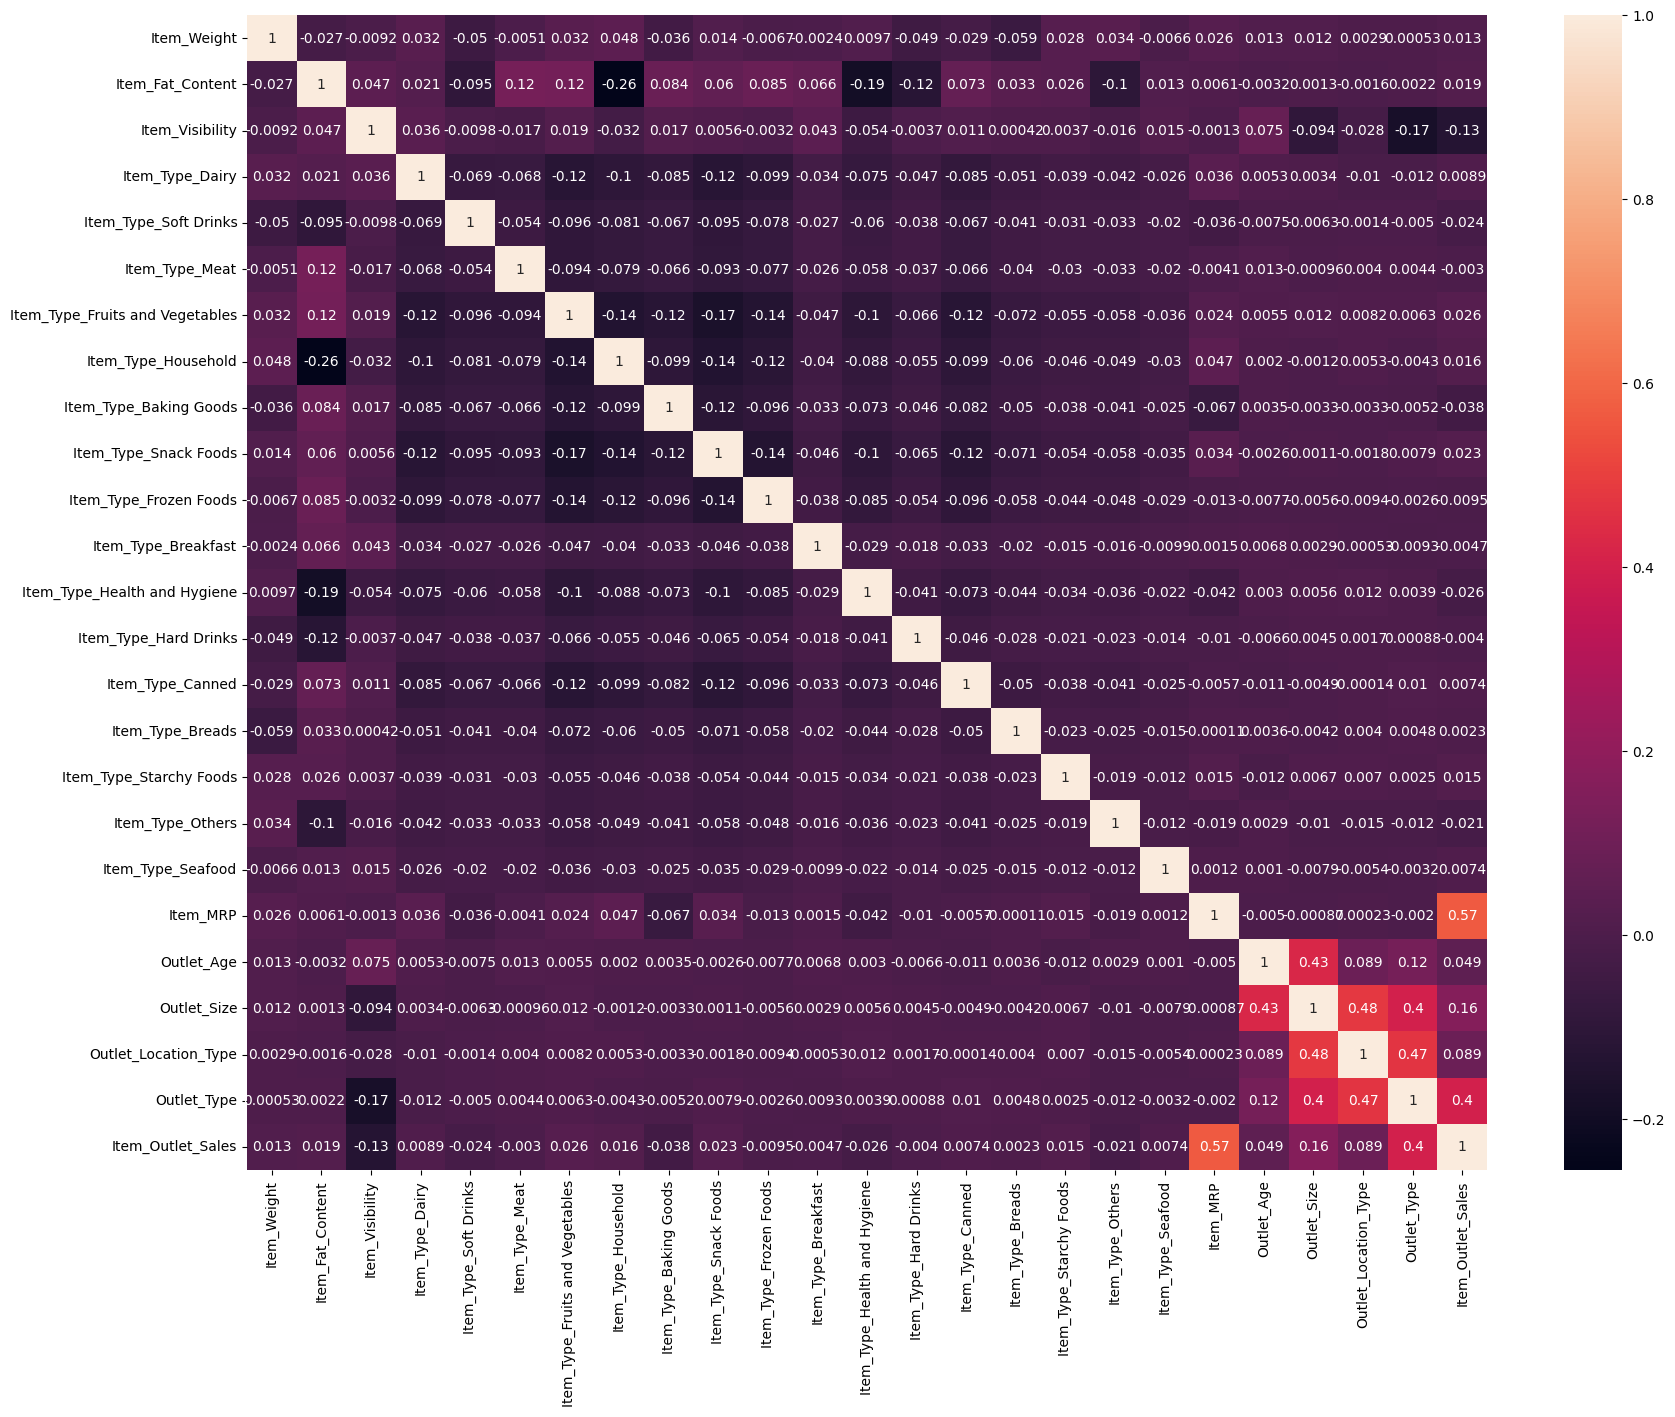

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(chk_df.corr(),annot=True)


In [ ]:
train_data_X_scaled_cols.columns.difference(chk_df.columns)

Index([], dtype='object')

In [ ]:
chk_df.columns.difference(train_data_X_scaled_cols.columns)

Index(['Item_Outlet_Sales'], dtype='object')

In [ ]:
train_data_X_scaled_cols.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type_Dairy',
       'Item_Type_Soft Drinks', 'Item_Type_Meat',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Household',
       'Item_Type_Baking Goods', 'Item_Type_Snack Foods',
       'Item_Type_Frozen Foods', 'Item_Type_Breakfast',
       'Item_Type_Health and Hygiene', 'Item_Type_Hard Drinks',
       'Item_Type_Canned', 'Item_Type_Breads', 'Item_Type_Starchy Foods',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_MRP', 'Outlet_Age',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
# train_data_X_scaled_cols.drop(columns='Item_Outlet_Sales',inplace=True)

In [ ]:
X=train_data_X_scaled_cols
y=train_data_bkp['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.3,random_state=41)

In [ ]:
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
model.coef_

array([-1.22361629e+01,  1.46199018e+01, -8.55228345e+01,  3.07557586e+15,
        2.52162475e+15,  2.46735637e+15,  3.98609305e+15,  3.50063750e+15,
        3.00442463e+15,  3.94260864e+15,  3.40720405e+15,  1.27944115e+15,
        2.71316752e+15,  1.77349429e+15,  3.00655105e+15,  1.91641982e+15,
        1.48071609e+15,  1.58029846e+15,  9.78583815e+14,  9.75464817e+02,
       -1.27319718e+01,  8.60681068e+01, -2.44960943e+02,  7.49463807e+02])

In [ ]:
model.intercept_

np.float64(2178.8006437520953)

In [ ]:
pred_train=model.predict(train_X)
pred_val=model.predict(val_X)

In [ ]:
train_res = eval(train_y,train_pred,'Train DS','Train_no_id_cols_res1')

Train DS :
RMSE: 1113.7992395456824
R_Square: 0.5700105871174243


In [ ]:
val_res = eval(val_y,val_pred,'Test DS','Test_no_id_cols_res1')

Test DS :
RMSE: 1164.7826604310444
R_Square: 0.5437853702273561


In [ ]:
result = res_df_mtd(train_res)
result

{'RMSE': 1113.7992395456824, 'R_Square': 0.5700105871174243, 'Set': 'Train_no_id_cols_res1'}
Type of Result: <class 'dict'>
temp_df:          RMSE  R_Square                    Set
0  1113.79924  0.570011  Train_no_id_cols_res1
inside if loop


RMSE  R_Square                    Set
0  1112.125178  0.571302             Train_res1
1  1164.884907  0.543705              Test_res1
2  1113.799240  0.570011             Train_res2
3  1164.782660  0.543785              Test_res2
4  1113.799240  0.570011  Train_no_id_cols_res1

In [ ]:
result = res_df_mtd(val_res)
result

{'RMSE': 1164.7826604310444, 'R_Square': 0.5437853702273561, 'Set': 'Test_no_id_cols_res1'}
Type of Result: <class 'dict'>
temp_df:          RMSE  R_Square                   Set
0  1164.78266  0.543785  Test_no_id_cols_res1
inside if loop


RMSE  R_Square                    Set
0  1112.125178  0.571302             Train_res1
1  1164.884907  0.543705              Test_res1
2  1113.799240  0.570011             Train_res2
3  1164.782660  0.543785              Test_res2
4  1113.799240  0.570011  Train_no_id_cols_res1
5  1164.782660  0.543785   Test_no_id_cols_res1

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
select_k_best = SelectKBest(f_regression,k=5)

In [ ]:
select_5_cols = select_k_best.fit_transform(X,y)

In [ ]:
select_k_best.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True])

In [ ]:
X.columns[select_k_best.get_support()]

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
X_5_best_cols=X[X.columns[select_k_best.get_support()]]

In [ ]:
X=X_5_best_cols

In [ ]:
test_df=X_5_best_cols

In [ ]:
test_df['Item_Outlet_Sales']=train_data['Item_Outlet_Sales']

/var/folders/8b/_vkggsks1pvdn519cywyj0_40000gn/T/ipykernel_8437/1680565315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Item_Outlet_Sales']=train_data['Item_Outlet_Sales']


In [ ]:
test_df.corr()

Item_Visibility  Item_MRP  Outlet_Size  \
Item_Visibility              1.000000 -0.001315    -0.094025   
Item_MRP                    -0.001315  1.000000    -0.000872   
Outlet_Size                 -0.094025 -0.000872     1.000000   
Outlet_Location_Type        -0.028099  0.000232     0.480075   
Outlet_Type                 -0.173468 -0.001975     0.401373   
Item_Outlet_Sales           -0.128625  0.567574     0.162753   

                      Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  
Item_Visibility                  -0.028099    -0.173468          -0.128625  
Item_MRP                          0.000232    -0.001975           0.567574  
Outlet_Size                       0.480075     0.401373           0.162753  
Outlet_Location_Type              1.000000     0.467219           0.089367  
Outlet_Type                       0.467219     1.000000           0.401522  
Item_Outlet_Sales                 0.089367     0.401522           1.000000

<Axes: >

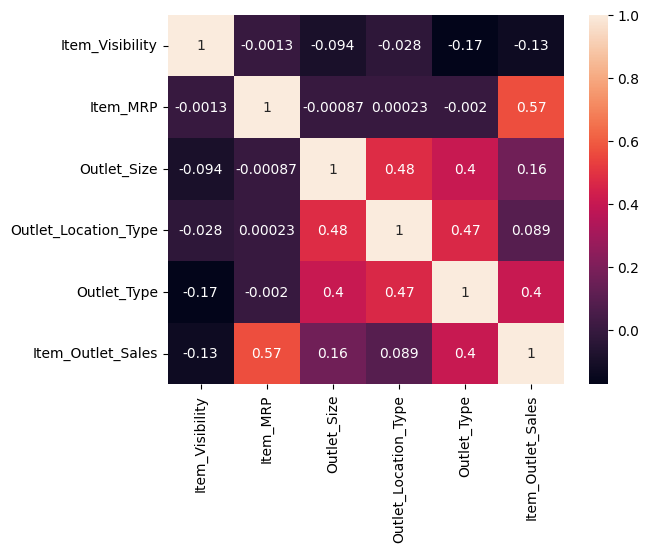

In [ ]:
sns.heatmap(test_df.corr(),annot=True)

In [ ]:
train_X,val_X,train_y,val_y = train_test_split(X,y,test_size=0.3,random_state=41)

In [ ]:
model.fit(train_X,train_y)

LinearRegression()

In [ ]:
model.coef_

array([-1.20326506e-13, -2.35062109e-14,  7.95929186e-14, -3.74451728e-14,
        1.24044668e-13,  1.00000000e+00])

In [ ]:
model.intercept_

np.float64(4.547473508864641e-13)

In [ ]:
pred_train=model.predict(train_X)
pred_val=model.predict(val_X)

In [ ]:
train_res = eval(train_y,train_pred,'Train DS','Train_5best_cols_res1')
val_res = eval(val_y,val_pred,'Test DS','Test_5best_cols_res1')

Train DS :
RMSE: 1113.7992395456824
R_Square: 0.5700105871174243
Test DS :
RMSE: 1164.7826604310444
R_Square: 0.5437853702273561


In [ ]:
result = res_df_mtd(train_res)
result

{'RMSE': 1113.7992395456824, 'R_Square': 0.5700105871174243, 'Set': 'Train_5best_cols_res1'}
Type of Result: <class 'dict'>
temp_df:          RMSE  R_Square                    Set
0  1113.79924  0.570011  Train_5best_cols_res1
inside if loop


RMSE  R_Square                    Set
0  1112.125178  0.571302             Train_res1
1  1164.884907  0.543705              Test_res1
2  1113.799240  0.570011             Train_res2
3  1164.782660  0.543785              Test_res2
4  1113.799240  0.570011  Train_no_id_cols_res1
5  1164.782660  0.543785   Test_no_id_cols_res1
6  1113.799240  0.570011  Train_5best_cols_res1

In [ ]:
result = res_df_mtd(val_res)
result

{'RMSE': 1164.7826604310444, 'R_Square': 0.5437853702273561, 'Set': 'Test_5best_cols_res1'}
Type of Result: <class 'dict'>
temp_df:          RMSE  R_Square                   Set
0  1164.78266  0.543785  Test_5best_cols_res1
inside if loop


RMSE  R_Square                    Set
0  1112.125178  0.571302             Train_res1
1  1164.884907  0.543705              Test_res1
2  1113.799240  0.570011             Train_res2
3  1164.782660  0.543785              Test_res2
4  1113.799240  0.570011  Train_no_id_cols_res1
5  1164.782660  0.543785   Test_no_id_cols_res1
6  1113.799240  0.570011  Train_5best_cols_res1
7  1164.782660  0.543785   Test_5best_cols_res1

In [ ]:
test_df.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<Axes: xlabel='Item_MRP'>

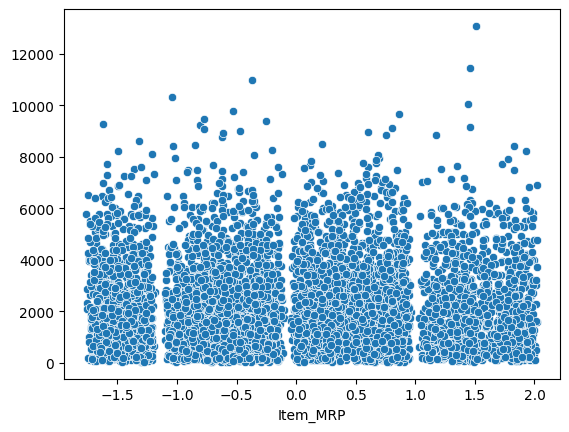

In [ ]:
sns.scatterplot(x=test_df['Item_MRP'][:5966],y=pred_train)

<Axes: xlabel='Item_MRP'>

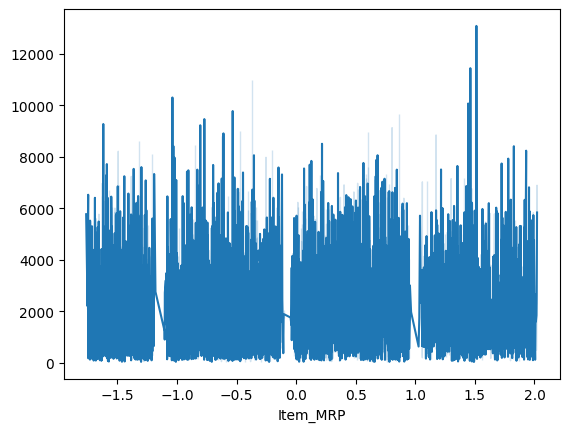

In [ ]:
sns.lineplot(x=test_df['Item_MRP'][:5966],y=pred_train)

# Pipeline creation

In [958]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.feature_selection import SelectKBest


In [ ]:
train_data=pd.read_csv('train_bm.csv')

In [ ]:
train_data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks   48.2692            OUT018   
2                      Meat  141.6180            OUT049   
3     Fruits and Vegetables  182.0950            OUT010   
4                 Household   53.8614            OUT013   
...                     ...       ...               ...   
8518            Snack Foods  214.5218            OUT013   
8519           Baking Goods  108.1570            OUT045   
8520     Health and Hygiene   85.1224            OUT035   
8521            Snack Foods  103.1332            OUT018   
8522            Soft Drinks   75.4670            OUT046   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2009      Medium               Tier 3   
2                          1999      Medium               Tier 1   
3                          1998         NaN               Tier 3   
4                          1987        High               Tier 3   
...                         ...         ...                  ...   
8518                       1987        High               Tier 3   
8519                       2002         NaN               Tier 2   
8520                       2004       Small               Tier 2   
8521                       2009      Medium               Tier 3   
8522                       1997       Small               Tier 1   

            Outlet_Type  Item_Outlet_Sales  
0     Supermarket Type1          3735.1380  
1     Supermarket Type2           443.4228  
2     Supermarket Type1          2097.2700  
3         Grocery Store           732.3800  
4     Supermarket Type1           994.7052  
...                 ...                ...  
8518  Supermarket Type1          2778.3834  
8519  Supermarket Type1           549.2850  
8520  Supermarket Type1          1193.1136  
8521  Supermarket Type2          1845.5976  
8522  Supermarket Type1           765.6700  

[8523 rows x 12 columns]

In [ ]:
train_data.duplicated().sum()

np.int64(0)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
train_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

In [ ]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train_data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
num_cols = train_data.select_dtypes(exclude='object').drop(columns=['Item_Outlet_Sales','Outlet_Establishment_Year']).columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')

In [ ]:
cat_cols = test_data.select_dtypes(include='object').drop(columns=['Item_Identifier','Outlet_Identifier']).columns
cat_cols

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
num_pipe_encode = Pipeline(steps=[
    ('impute_num',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
    ])

In [ ]:
cat_pipe_encode = Pipeline(steps=[
    ('impute_cat',SimpleImputer(strategy='constant',fill_value='small')),
    ('ohe',OneHotEncoder())
    ])

In [ ]:
# date_pipe_transform = Pipeline(steps=[('date_transform',)])

In [ ]:
preprocess = ColumnTransformer(
    transformers=[
        ('num_encode',num_pipe_encode,num_cols),
        ('cat_encode',cat_pipe_encode,cat_cols)
        ]
)

In [959]:
# model_pipeline = Pipeline(steps=[
#     ('preprocess',preprocess),
#     ('lin_reg',LinearRegression())
#     ])

In [961]:
select_5_cols = SelectKBest()

In [964]:
model_pipeline = Pipeline(steps=[
    ('preprocess',preprocess),
    ('feature_selection',SelectKBest(f_regression,k=5)),
    ('lin_reg',LinearRegression())
    ])

In [965]:
X = train_data.drop(columns=['Item_Outlet_Sales'])
y = train_data[['Item_Outlet_Sales']]

In [ ]:
X.head(2)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDA15         9.30          Low Fat         0.016047        Dairy   
1           DRC01         5.92          Regular         0.019278  Soft Drinks   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 3  Supermarket Type2

In [ ]:
X.duplicated().sum()

np.int64(0)

In [ ]:
y.head(2)

Item_Outlet_Sales
0          3735.1380
1           443.4228

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X,y,test_size=0.3, random_state=41)
train_data.shape, train_X.shape, train_y.shape, val_X.shape, val_y.shape

((8523, 12), (5966, 11), (5966, 1), (2557, 11), (2557, 1))

In [ ]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('num_encode',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(fill_value='small',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])),
                ('lin_reg', LinearRegression())])

In [966]:
model_pipeline.fit(train_X, train_y)

/Users/bkannadasan/Documents/GitHub/DataScience/.conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(fill_value='small',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=5,
                             score_func=<function f_regression at 0x13dc96a20>)),
                ('lin_reg', LinearRegression())])

In [994]:
print(model_pipeline.named_steps['lin_reg'].coef_)
print(model_pipeline.named_steps['lin_reg'].intercept_)

[[  971.44348191  -137.13636522   -22.10341671 -1935.37173662
   1537.95293464]]
[2300.27098463]


In [995]:
os.getcwd()

'/Users/bkannadasan/Documents/GitHub/DataScience/MachineLearning/Linear_regression_practice'

In [990]:
import joblib

In [992]:
joblib.dump(model_pipeline,'bm_pipeline.pkl')

['bm_pipeline.pkl']

In [ ]:
model_pipeline.fit(train_X,train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('num_encode',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(fill_value='small',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))])),
                ('lin_reg', LinearRegression())])

In [970]:
train_pred = model_pipeline.predict(train_X)
val_pred = model_pipeline.predict(val_X)

In [971]:
train_y.head()

Item_Outlet_Sales
5367          2596.6200
297           1418.1540
5435          2127.2310
701           1150.5024
2079           525.3162

In [1003]:
train_X[train_X['Item_Identifier']=='FDP10']

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
4585           FDP10         19.0          Low Fat         0.128090   
7              FDP10          NaN          Low Fat         0.127470   
585            FDP10         19.0          Low Fat         0.128066   
7883           FDP10         19.0          Low Fat         0.127984   
3382           FDP10         19.0          Low Fat         0.128289   
6087           FDP10         19.0          Low Fat         0.128350   

        Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
4585  Snack Foods  107.0622            OUT046                       1997   
7     Snack Foods  107.7622            OUT027                       1985   
585   Snack Foods  104.3622            OUT035                       2004   
7883  Snack Foods  107.6622            OUT013                       1987   
3382  Snack Foods  104.9622            OUT049                       1999   
6087  Snack Foods  106.5622            OUT045                       2002   

     Outlet_Size Outlet_Location_Type        Outlet_Type  
4585       Small               Tier 1  Supermarket Type1  
7         Medium               Tier 3  Supermarket Type3  
585        Small               Tier 2  Supermarket Type1  
7883        High               Tier 3  Supermarket Type1  
3382      Medium               Tier 1  Supermarket Type1  
6087         NaN               Tier 2  Supermarket Type1

In [1009]:
train_y.sort_index().head(10)

Item_Outlet_Sales
0           3735.1380
1            443.4228
2           2097.2700
3            732.3800
5            556.6088
6            343.5528
7           4022.7636
8           1076.5986
9           4710.5350
10          1516.0266

In [1017]:
train_y.sort_index().head(10)

Item_Outlet_Sales
0           3735.1380
1            443.4228
2           2097.2700
3            732.3800
5            556.6088
6            343.5528
7           4022.7636
8           1076.5986
9           4710.5350
10          1516.0266

In [1020]:
chtrain_pred

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [972]:
train_y.shape

(5966, 1)

In [973]:
train_y['Item_Outlet_Sales']

5367    2596.6200
297     1418.1540
5435    2127.2310
701     1150.5024
2079     525.3162
          ...    
8513     595.2252
5200    2804.3496
4066    2467.4548
931     1611.9018
1984    4086.0146
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

In [974]:
tp_df=pd.DataFrame(train_pred,columns=['Item_Outlet_Sales'])

In [975]:
tp_df.head()

Item_Outlet_Sales
0        2689.756225
1        2312.349560
2        2324.765964
3         820.500201
4         880.360220

In [976]:
tp_df['Item_Outlet_Sales']

0       2689.756225
1       2312.349560
2       2324.765964
3        820.500201
4        880.360220
           ...     
5961    1661.004482
5962    1699.477074
5963    2225.878877
5964    2883.257180
5965    3834.826097
Name: Item_Outlet_Sales, Length: 5966, dtype: float64

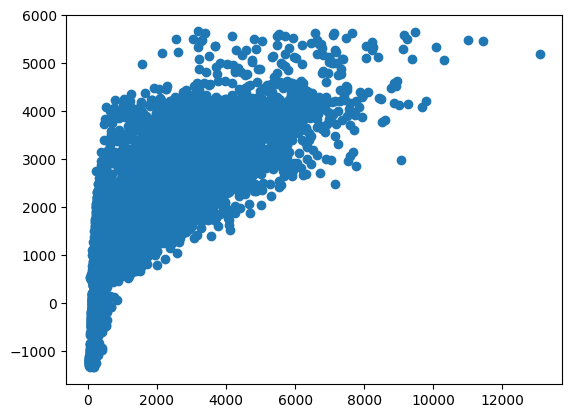

In [977]:
plt.scatter(train_y,tp_df)

In [978]:
err=(train_y-train_pred)
err

Item_Outlet_Sales
5367         -93.136225
297         -894.195560
5435        -197.534964
701          330.002199
2079        -355.044020
...                 ...
8513       -1065.779282
5200        1104.872526
4066         241.575923
931        -1271.355380
1984         251.188503

[5966 rows x 1 columns]

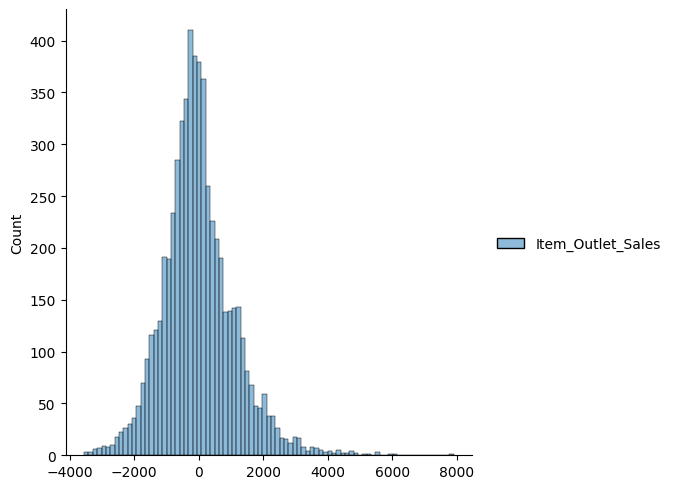

In [979]:
sns.displot(err)

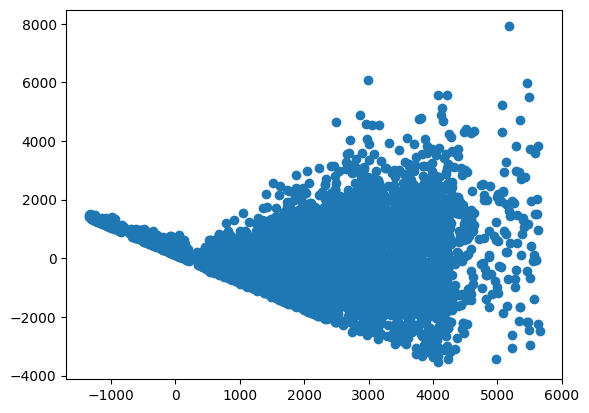

In [980]:
plt.scatter(train_pred,err)

In [981]:
sns.scatterplot(train_y,tp_df)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
sns.scatterplot(train_y['Item_Outlet_Sales'],tp_df['Item_Outlet_Sales'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [982]:
train_pred_df=pd.DataFrame(train_pred,columns=['result'])

In [983]:
train_pred_df

result
0     2689.756225
1     2312.349560
2     2324.765964
3      820.500201
4      880.360220
...           ...
5961  1661.004482
5962  1699.477074
5963  2225.878877
5964  2883.257180
5965  3834.826097

[5966 rows x 1 columns]

In [984]:
train_pred_df[train_pred_df['result']<0]

result
89    -111.386630
142   -619.612532
152   -336.016516
191  -1095.187140
193   -365.428720
...           ...
5843  -185.588553
5908  -189.440399
5912  -426.582152
5936  -665.652559
5949  -486.444479

[298 rows x 1 columns]

In [986]:
train_res = eval(train_y,train_pred,'Train DS','Train_with_k5_pln_res1')
val_res = eval(val_y,val_pred,'Test DS','Test_with_k5_pln_res1')

Train DS :
RMSE: 1117.5113296092813
R_Square: 0.5671396580942796
Test DS :
RMSE: 1166.6665240534212
R_Square: 0.542308457516107


In [987]:
result1 = res_df_mtd(train_res)
print(result1)
result2 = res_df_mtd(val_res)
print(result2)

{'RMSE': 1117.5113296092813, 'R_Square': 0.5671396580942796, 'Set': 'Train_with_k5_pln_res1'}
Type of Result: <class 'dict'>
temp_df:          RMSE  R_Square                     Set
0  1117.51133   0.56714  Train_with_k5_pln_res1
inside if loop
           RMSE  R_Square                     Set
0   1112.125178  0.571302              Train_res1
1   1164.884907  0.543705               Test_res1
2   1113.799240  0.570011              Train_res2
3   1164.782660  0.543785               Test_res2
4   1113.799240  0.570011   Train_no_id_cols_res1
5   1164.782660  0.543785    Test_no_id_cols_res1
6   1113.799240  0.570011   Train_5best_cols_res1
7   1164.782660  0.543785    Test_5best_cols_res1
8   1113.799240  0.570011     Train_with_pln_res1
9   1164.782660  0.543785      Test_with_pln_res1
10  1117.511330  0.567140  Train_with_k5_pln_res1
{'RMSE': 1166.6665240534212, 'R_Square': 0.542308457516107, 'Set': 'Test_with_k5_pln_res1'}
Type of Result: <class 'dict'>
temp_df:           RMSE  R_Squar

In [988]:
global_res_df

RMSE  R_Square                     Set
0   1112.125178  0.571302              Train_res1
1   1164.884907  0.543705               Test_res1
2   1113.799240  0.570011              Train_res2
3   1164.782660  0.543785               Test_res2
4   1113.799240  0.570011   Train_no_id_cols_res1
5   1164.782660  0.543785    Test_no_id_cols_res1
6   1113.799240  0.570011   Train_5best_cols_res1
7   1164.782660  0.543785    Test_5best_cols_res1
8   1113.799240  0.570011     Train_with_pln_res1
9   1164.782660  0.543785      Test_with_pln_res1
10  1117.511330  0.567140  Train_with_k5_pln_res1
11  1166.666524  0.542308   Test_with_k5_pln_res1

In [ ]:
test_data

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dairy   87.3198            OUT017   
2                 Others  241.7538            OUT010   
3            Snack Foods  155.0340            OUT017   
4                  Dairy  234.2300            OUT027   
...                  ...       ...               ...   
5676         Snack Foods  141.3154            OUT046   
5677       Starchy Foods  169.1448            OUT018   
5678  Health and Hygiene  118.7440            OUT045   
5679              Canned  214.6218            OUT017   
5680              Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                          1999      Medium               Tier 1   
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5676                       1997       Small               Tier 1   
5677                       2009      Medium               Tier 3   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
0     Supermarket Type1  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
...                 ...  
5676  Supermarket Type1  
5677  Supermarket Type2  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[5681 rows x 11 columns]

In [ ]:
actual_test_res=model_pipeline.predict(test_data)

In [ ]:
actual_test_res.shape

(5681, 1)

In [ ]:
final_result=pd.DataFrame(actual_test_res,columns=['Item_Outlet_Sales'])

In [ ]:
final_result[final_result['Item_Outlet_Sales']<0]

Item_Outlet_Sales
30         -1322.793781
37           -78.294385
41           -47.058598
46         -1105.769197
112         -672.715044
...                 ...
5514       -1141.820459
5580        -303.862544
5583        -230.132908
5650         -11.820389
5668         -78.607319

[284 rows x 1 columns]

In [ ]:
test_data.iloc[[30,37,41]]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
30           NCR42          NaN          Low Fat         0.067377   
37           FDD48       10.395          Low Fat         0.050479   
41           FDY19       19.750               LF         0.069236   

                Item_Type  Item_MRP Outlet_Identifier  \
30              Household   32.0900            OUT019   
37           Baking Goods  114.0176            OUT010   
41  Fruits and Vegetables  116.6466            OUT010   

    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type    Outlet_Type  
30                       1985       Small               Tier 1  Grocery Store  
37                       1998         NaN               Tier 3  Grocery Store  
41                       1998         NaN               Tier 3  Grocery Store

In [ ]:
cols=test_data.columns

In [ ]:
test_data[test_data[cols].isna()]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility Item_Type  \
0                NaN          NaN              NaN              NaN       NaN   
1                NaN          NaN              NaN              NaN       NaN   
2                NaN          NaN              NaN              NaN       NaN   
3                NaN          NaN              NaN              NaN       NaN   
4                NaN          NaN              NaN              NaN       NaN   
...              ...          ...              ...              ...       ...   
5676             NaN          NaN              NaN              NaN       NaN   
5677             NaN          NaN              NaN              NaN       NaN   
5678             NaN          NaN              NaN              NaN       NaN   
5679             NaN          NaN              NaN              NaN       NaN   
5680             NaN          NaN              NaN              NaN       NaN   

      Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0          NaN               NaN                        NaN         NaN   
1          NaN               NaN                        NaN         NaN   
2          NaN               NaN                        NaN         NaN   
3          NaN               NaN                        NaN         NaN   
4          NaN               NaN                        NaN         NaN   
...        ...               ...                        ...         ...   
5676       NaN               NaN                        NaN         NaN   
5677       NaN               NaN                        NaN         NaN   
5678       NaN               NaN                        NaN         NaN   
5679       NaN               NaN                        NaN         NaN   
5680       NaN               NaN                        NaN         NaN   

     Outlet_Location_Type Outlet_Type  
0                     NaN         NaN  
1                     NaN         NaN  
2                     NaN         NaN  
3                     NaN         NaN  
4                     NaN         NaN  
...                   ...         ...  
5676                  NaN         NaN  
5677                  NaN         NaN  
5678                  NaN         NaN  
5679                  NaN         NaN  
5680                  NaN         NaN  

[5681 rows x 11 columns]

In [ ]:
test_data[test_data.isna().any(axis=1)]

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
7              FDC48          NaN          Low Fat         0.015782   
...              ...          ...              ...              ...   
5669           FDN31          NaN          Low Fat         0.072529   
5670           FDO03       10.395          Regular         0.037092   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

                  Item_Type  Item_MRP Outlet_Identifier  \
1                     Dairy   87.3198            OUT017   
2                    Others  241.7538            OUT010   
3               Snack Foods  155.0340            OUT017   
4                     Dairy  234.2300            OUT027   
7              Baking Goods   81.0592            OUT027   
...                     ...       ...               ...   
5669  Fruits and Vegetables  188.0530            OUT027   
5670                   Meat  229.4352            OUT017   
5678     Health and Hygiene  118.7440            OUT045   
5679                 Canned  214.6218            OUT017   
5680                 Canned   79.7960            OUT045   

      Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
1                          2007         NaN               Tier 2   
2                          1998         NaN               Tier 3   
3                          2007         NaN               Tier 2   
4                          1985      Medium               Tier 3   
7                          1985      Medium               Tier 3   
...                         ...         ...                  ...   
5669                       1985      Medium               Tier 3   
5670                       2007         NaN               Tier 2   
5678                       2002         NaN               Tier 2   
5679                       2007         NaN               Tier 2   
5680                       2002         NaN               Tier 2   

            Outlet_Type  
1     Supermarket Type1  
2         Grocery Store  
3     Supermarket Type1  
4     Supermarket Type3  
7     Supermarket Type3  
...                 ...  
5669  Supermarket Type3  
5670  Supermarket Type1  
5678  Supermarket Type1  
5679  Supermarket Type1  
5680  Supermarket Type1  

[2582 rows x 11 columns]

# pipeline 2

In [ ]:
num_pipe_encode = Pipeline(steps=[
    ('impute_num',SimpleImputer(strategy='mean')),
    ('scale',StandardScaler())
    ])

In [ ]:
cat_pipe_encode=Pipeline(steps=[
    ('impute_cat',SimpleImputer(strategy='constant',fill_value='small')),
    ('ohe',OneHotEncoder())
    ])

In [ ]:
train_data['Item_Weight'][(train_data['Item_Identifier'] == 'DRG13') ]

3027    17.25
4292    17.25
5323    17.25
6428    17.25
8487      NaN
Name: Item_Weight, dtype: float64

In [ ]:
X['Item_Weight'][(X['Item_Identifier'] == 'DRG13') ]

3027    17.25
4292    17.25
5323    17.25
6428    17.25
8487      NaN
Name: Item_Weight, dtype: float64

In [ ]:
preprocess=ColumnTransformer(transformers=[
    ('num_encode',num_pipe_encode,num_cols),
    ('cat_encode',cat_pipe_encode,cat_cols)
    ])

In [ ]:
preprocess_pipeline = Pipeline(steps=[('preprocess_pipeline',preprocess)])

In [ ]:
preprocess_pipeline

Pipeline(steps=[('preprocess_pipeline',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP'], dtype='object')),
                                                 ('cat_encode',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(fill_value='small',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object'))]))])

In [ ]:
new_df=preprocess_pipeline.fit_transform(X)

In [ ]:
new_df

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 66721 stored elements and shape (8523, 35)>